In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.decomposition
from scipy import stats
import statsmodels.stats.multitest
from collections import defaultdict


In [5]:
pvals = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/4eqtls/expressionPCs/gene-snp-eqtl_PCs_pvalue', sep='\t', index_col=0)

In [6]:
pvals

PC0       PC1      PC10     PC100     PC101     PC102     PC103  \
SNP                                                                             
SNP0     0.424868  0.471288  0.775339  0.254812  0.060563  0.132723  0.045193   
SNP1     0.213579  0.552687  0.486146  0.038815  0.198518  0.570868  0.746855   
SNP10    0.960355  0.906801  0.720206  0.452339  0.310760  0.676140  0.159862   
SNP100   0.071278  0.956083  0.014461  0.247872  0.592355  0.086232  0.086467   
SNP1000  0.089389  0.420843  0.880981  0.011694  0.217514  0.121064  0.999413   
...           ...       ...       ...       ...       ...       ...       ...   
SNP995   0.740421  0.127512  0.434048  0.551372  0.695780  0.646144  0.506161   
SNP996   0.318950  0.829834  0.851266  0.683131  0.739257  0.652910  0.634678   
SNP997   0.060471  0.595327  0.958779  0.645321  0.836001  0.571240  0.961650   
SNP998   0.790771  0.301962  0.245963  0.678103  0.949584  0.263179  0.351550   
SNP999   0.416940  0.908071  0.093521  0.269194  0.091532  0.061182  0.351257   

            PC104     PC105     PC106  ...      PC90      PC91      PC92  \
SNP                                    ...                                 
SNP0     0.145287  0.049432  0.181431  ...  0.961542  0.516909  0.356899   
SNP1     0.665312  0.214433  0.009168  ...  0.000004  0.192222  0.241515   
SNP10    0.068342  0.742826  0.536747  ...  0.680935  0.523765  0.354972   
SNP100   0.830607  0.434668  0.542994  ...  0.088825  0.329023  0.256812   
SNP1000  0.632225  0.518565  0.502960  ...  0.859102  0.611222  0.959585   
...           ...       ...       ...  ...       ...       ...       ...   
SNP995   0.009611  0.473491  0.655364  ...  0.174019  0.161138  0.353894   
SNP996   0.687729  0.720707  0.892700  ...  0.317186  0.437884  0.730820   
SNP997   0.990225  0.778368  0.510655  ...  0.172656  0.862267  0.940239   
SNP998   0.994945  0.062523  0.391437  ...  0.663184  0.241905  0.194075   
SNP999   0.962622  0.771614  0.918839  ...  0.136165  0.213099  0.321379   

             PC93      PC94      PC95      PC96      PC97      PC98      PC99  
SNP                                                                            
SNP0     0.000683  0.859491  0.319704  0.000399  0.557293  0.853845  0.667185  
SNP1     0.718867  0.023245  0.222099  0.601892  0.628859  0.628242  0.417261  
SNP10    0.320726  0.571816  0.340562  0.748159  0.632281  0.249530  0.868232  
SNP100   0.944235  0.975617  0.103035  0.777155  0.698623  0.867949  0.986273  
SNP1000  0.714536  0.989639  0.710759  0.758876  0.672932  0.229353  0.710132  
...           ...       ...       ...       ...       ...       ...       ...  
SNP995   0.944658  0.685665  0.222394  0.106315  0.902366  0.441769  0.098773  
SNP996   0.799439  0.375735  0.321751  0.619860  0.680079  0.312052  0.821832  
SNP997   0.639729  0.584457  0.248236  0.182704  0.746313  0.551834  0.105083  
SNP998   0.078112  0.461367  0.806149  0.552240  0.516477  0.940094  0.060569  
SNP999   0.237019  0.546522  0.659196  0.216677  0.425271  0.687089  0.668532  

[3000 rows x 500 columns]

In [7]:
np.array(pvals)

array([[0.42486811, 0.47128823, 0.77533912, ..., 0.55729283, 0.85384549,
        0.66718499],
       [0.21357938, 0.55268742, 0.48614557, ..., 0.62885884, 0.62824247,
        0.41726069],
       [0.9603551 , 0.90680134, 0.72020622, ..., 0.63228093, 0.24953042,
        0.86823225],
       ...,
       [0.06047064, 0.59532655, 0.95877866, ..., 0.74631292, 0.55183401,
        0.10508286],
       [0.79077128, 0.30196232, 0.24596302, ..., 0.51647738, 0.94009411,
        0.06056915],
       [0.41693982, 0.90807067, 0.09352065, ..., 0.42527126, 0.68708885,
        0.66853214]])

In [12]:
np.sum([pvals.loc['SNP0'] < 0.05])

37

In [24]:
count = pvals[pvals < 0.05].count()

In [41]:
count.sort_values()

PC491    119
PC235    120
PC96     121
PC271    123
PC446    124
        ... 
PC19     183
PC162    183
PC44     184
PC246    185
PC182    186
Length: 500, dtype: int64

In [56]:
sorted(list(count))

[119,
 120,
 121,
 123,
 124,
 124,
 124,
 124,
 126,
 129,
 129,
 129,
 129,
 130,
 130,
 130,
 131,
 131,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 133,
 133,
 133,
 133,
 133,
 133,
 134,
 134,
 134,
 134,
 134,
 135,
 135,
 135,
 135,
 135,
 135,
 135,
 135,
 136,
 136,
 136,
 136,
 136,
 136,
 136,
 136,
 137,
 137,
 137,
 137,
 137,
 137,
 137,
 137,
 137,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 141,
 141,
 141,
 141,
 141,
 141,
 141,
 141,
 141,
 141,
 141,
 141,
 141,
 141,
 141,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 145,
 145,
 145,
 145,
 145,
 145,
 145,
 145,
 145,
 145,
 145,
 145,
 145,
 145,
 146,
 146,
 146,
 146,
 146,
 146,
 146,
 146

In [31]:
pvals.columns

Index(['PC0', 'PC1', 'PC10', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104',
       'PC105', 'PC106',
       ...
       'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98',
       'PC99'],
      dtype='object', length=500)

Text(0, 0.5, 'Count')

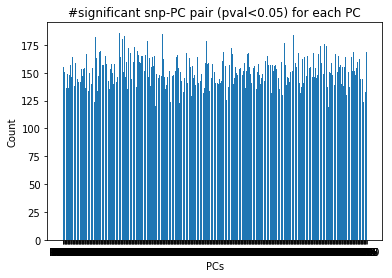

In [55]:
plt.bar(pvals.columns, list(count))
plt.title('#significant snp-PC pair (pval<0.05) for each PC')
plt.xlabel('PCs')
plt.ylabel('Count')

In [27]:
type(count)

pandas.core.series.Series

In [28]:
?plt.bar

In [18]:
pvals_filter = pvals[pvals < 0.05].count()

In [93]:
def perform_pca(input):
    expression = pd.read_csv(input, sep='\t', index_col=0)
#     expression.set_index('Unnamed: 0', inplace=True)
    samples = list(expression.columns)
    expression_trans = expression.values.transpose()
    #pca = sklearn.decomposition.PCA(n_components=100)
    pca = sklearn.decomposition.PCA()
    pca.fit(expression_trans)
    expression_trans_pca = pca.transform(expression_trans)
    PCs = ['PC' + str(i) for i in range(len(expression_trans_pca[0]))]
    PC_trans_df = pd.DataFrame(expression_trans_pca.T, columns=samples, index=PCs)
    return pca, expression_trans_pca, PC_trans_df

Text(0.5, 1.0, '4 eqtls (unshuffled) with gene correlation')

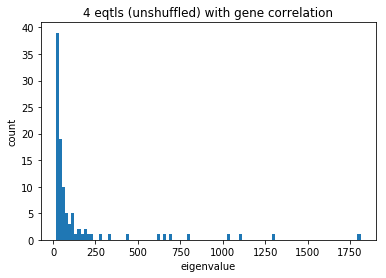

In [49]:
pca, expression_trans_pca, PC_trans_df = perform_pca('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/4eqtls/expression.csv')
plt.hist(pca.explained_variance_, bins=100)
plt.xlabel('eigenvalue')
plt.ylabel('count')
plt.title('4 eqtls (unshuffled) with gene correlation')

Text(0.5, 1.0, '4 eqtls (shuffled) with gene correlation')

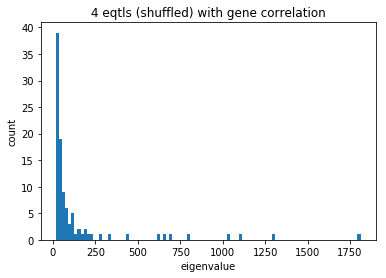

In [48]:
pca, expression_trans_pca, PC_trans_df = perform_pca('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/4eqtls_shuffled/expression.csv')
plt.hist(pca.explained_variance_, bins=100)
plt.xlabel('eigenvalue')
plt.ylabel('count')
plt.title('4 eqtls (shuffled) with gene correlation')

Text(0.5, 1.0, '10 uncorrected peer factors')

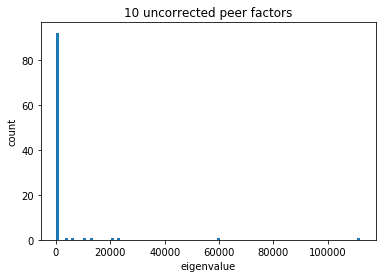

In [50]:
pca, expression_trans_pca, PC_trans_df = perform_pca('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/peer_only/expression.csv')
plt.hist(pca.explained_variance_, bins=100)
plt.xlabel('eigenvalue')
plt.ylabel('count')
plt.title('10 uncorrected peer factors')

Text(0.5, 1.0, '10 corrected peer factors')

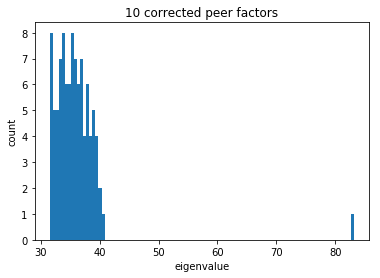

In [51]:
pca, expression_trans_pca, PC_trans_df = perform_pca('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/peer_only/peer_residuals.tsv')
plt.hist(pca.explained_variance_, bins=100)
plt.xlabel('eigenvalue')
plt.ylabel('count')
plt.title('10 corrected peer factors')

Text(0.5, 1.0, '10 uncorrected peer factors and gene correlation')

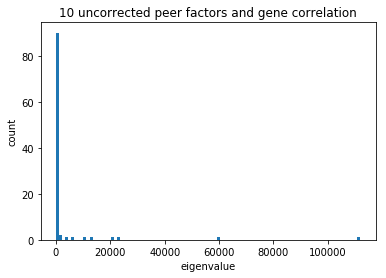

In [52]:
pca, expression_trans_pca, PC_trans_df = perform_pca('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/peer_genecorr/expression.csv')
plt.hist(pca.explained_variance_, bins=100)
plt.xlabel('eigenvalue')
plt.ylabel('count')
plt.title('10 uncorrected peer factors and gene correlation')

Text(0.5, 1.0, '10 corrected peer factors and gene correlation')

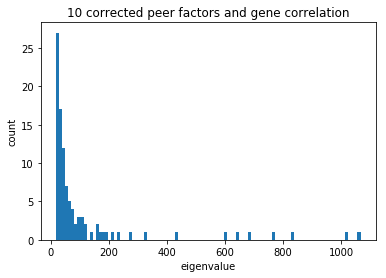

In [53]:
pca, expression_trans_pca, PC_trans_df = perform_pca('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/peer_genecorr/peer_residuals.tsv')
plt.hist(pca.explained_variance_, bins=100)
plt.xlabel('eigenvalue')
plt.ylabel('count')
plt.title('10 corrected peer factors and gene correlation')

Text(0.5, 1.0, 'Null dataset')

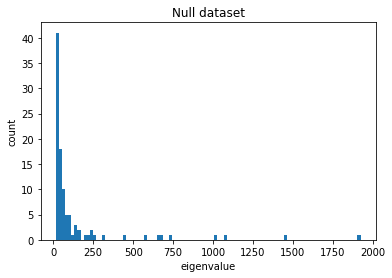

In [54]:
pca, expression_trans_pca, PC_trans_df = perform_pca('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_0/Beta_0/Simulation_0/expression.csv')
plt.hist(pca.explained_variance_, bins=100)
plt.xlabel('eigenvalue')
plt.ylabel('count')
plt.title('Null dataset')


In [62]:
nerve_pcs = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve-Tibial_Euro/chr1/expressionPCs/matrixeQTL_PCs_pvalue_converted_chr1', sep='\t', index_col=0)

In [63]:
nerve_pcs

PC0       PC1      PC10     PC100     PC101     PC102  \
SNP                                                                          
chr1_100007048  0.723545  0.241314  0.752032  0.482281  0.097623  0.940580   
chr1_100110377  0.824195  0.043149  0.267660  0.505947  0.154656  0.475352   
chr1_100133310  0.846183  0.214631  0.740135  0.349152  0.126846  0.875722   
chr1_100206504  0.666063  0.802399  0.444085  0.417925  0.433930  0.675321   
chr1_100484304  0.942384  0.523014  0.380313  0.650331  0.091741  0.456477   
...                  ...       ...       ...       ...       ...       ...   
chr1_98953091   0.655006  0.746562  0.517029  0.261703  0.612680  0.651823   
chr1_9922329    0.904728  0.414791  0.761752  0.737211  0.043377  0.172390   
chr1_99870805   0.199556  0.758105  0.214214  0.385053  0.816365  0.108865   
chr1_99892547   0.224365  0.236882  0.526402  0.207537  0.462701  0.867110   
chr1_999842     0.809574  0.577541  0.855574  0.919860  0.672308  0.102999   

                   PC103     PC104     PC105     PC106  ...      PC90  \
SNP                                                     ...             
chr1_100007048  0.223741  0.597095  0.910083  0.434822  ...  0.766266   
chr1_100110377  0.857548  0.733740  0.635220  0.362196  ...  0.649636   
chr1_100133310  0.227033  0.725931  0.902972  0.328906  ...  0.791721   
chr1_100206504  0.440724  0.045751  0.303897  0.607897  ...  0.841770   
chr1_100484304  0.264667  0.812048  0.419462  0.183733  ...  0.131949   
...                  ...       ...       ...       ...  ...       ...   
chr1_98953091   0.233871  0.181522  0.587880  0.007537  ...  0.330356   
chr1_9922329    0.300075  0.189293  0.835163  0.166864  ...  0.898187   
chr1_99870805   0.579106  0.792498  0.174204  0.450216  ...  0.293028   
chr1_99892547   0.772984  0.717200  0.259578  0.624858  ...  0.650347   
chr1_999842     0.191045  0.527496  0.450991  0.667736  ...  0.749728   

                    PC91      PC92      PC93      PC94      PC95      PC96  \
SNP                                                                          
chr1_100007048  0.617197  0.698311  0.149145  0.244138  0.204419  0.144856   
chr1_100110377  0.545304  0.543986  0.951497  0.309546  0.926506  0.757309   
chr1_100133310  0.707414  0.751614  0.127075  0.254502  0.285489  0.181441   
chr1_100206504  0.455061  0.495922  0.491328  0.313777  0.666849  0.223190   
chr1_100484304  0.397051  0.676082  0.112181  0.713473  0.899880  0.544297   
...                  ...       ...       ...       ...       ...       ...   
chr1_98953091   0.312208  0.295726  0.275119  0.428985  0.983400  0.239077   
chr1_9922329    0.438182  0.163132  0.847879  0.771831  0.999839  0.509085   
chr1_99870805   0.731895  0.677783  0.822303  0.178270  0.876929  0.577549   
chr1_99892547   0.023303  0.730375  0.034715  0.747005  0.327425  0.990284   
chr1_999842     0.512593  0.502279  0.047875  0.771617  0.629597  0.036656   

                    PC97      PC98      PC99  
SNP                                           
chr1_100007048  0.303513  0.039934  0.257256  
chr1_100110377  0.039919  0.560797  0.864003  
chr1_100133310  0.244447  0.044830  0.272896  
chr1_100206504  0.598440  0.092825  0.453647  
chr1_100484304  0.803128  0.166615  0.671112  
...                  ...       ...       ...  
chr1_98953091   0.807123  0.940577  0.574921  
chr1_9922329    0.954409  0.527664  0.375119  
chr1_99870805   0.164139  0.693253  0.582747  
chr1_99892547   0.596882  0.216087  0.722772  
chr1_999842     0.502226  0.960975  0.360294  

[2233 rows x 449 columns]

In [65]:
pval_flat = np.array(nerve_pcs).flatten()
pvals_adj = statsmodels.stats.multitest.multipletests(pval_flat, alpha=0.05, method='fdr_bh')
pvalues_adjusted = pvals_adj[1].reshape((2233, 449))
pvalues_adj_df = pd.DataFrame(pvalues_adjusted, columns=nerve_pcs.columns, index=nerve_pcs.index)

In [71]:
# labels_pos = []
# labels = []
# for key, value in chr_start.items():
#     labels_pos.append(value+5000)
#     labels.append(key)
    
# pc_labels_pos = []
pc_labels = []
for pc in pvalues_adj_df.columns:
    pc_num = int(pc.split('PC')[1])
    if pc_num % 20 == 0:
        pc_labels.append(pc_num)
pc_labels.append(460)

Text(0, 0.5, 'PC number')

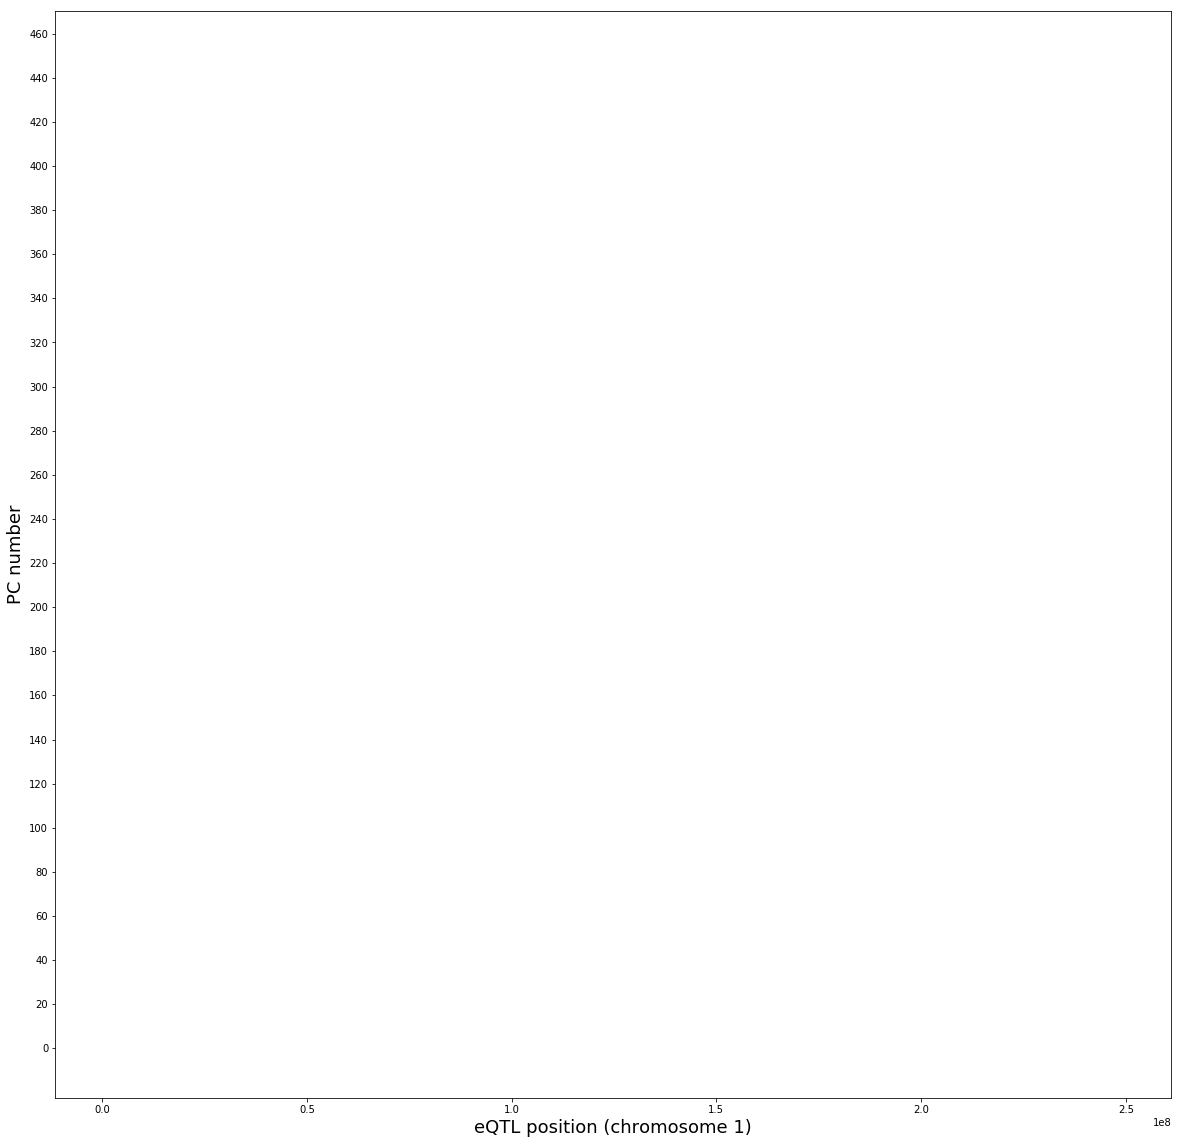

In [73]:
fig, ax = plt.subplots(figsize=(20, 20))
for snp, pcs in pvalues_adj_df.iterrows():
#     print(snp)
    x_pos = [int(snp.split('_')[1])]*len(pcs)
    y_pos = []
    size = []
    
    for name, pvalue in pcs.items():
        pc_num = name.split('PC')[1]
        y_pos.append(pc_num)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
#         print(snp, name, pvalue, size)
    plt.scatter(x_pos, y_pos, s=size, color='black')
# ax.set_xticks(labels_pos)
# ax.set_xticklabels(labels)
ax.set_yticks(pc_labels)
ax.set_yticklabels(pc_labels)
plt.xlabel('eQTL position (chromosome 1)', fontsize=18)
plt.ylabel('PC number', fontsize=18)

Text(0, 0.5, 'PC number')

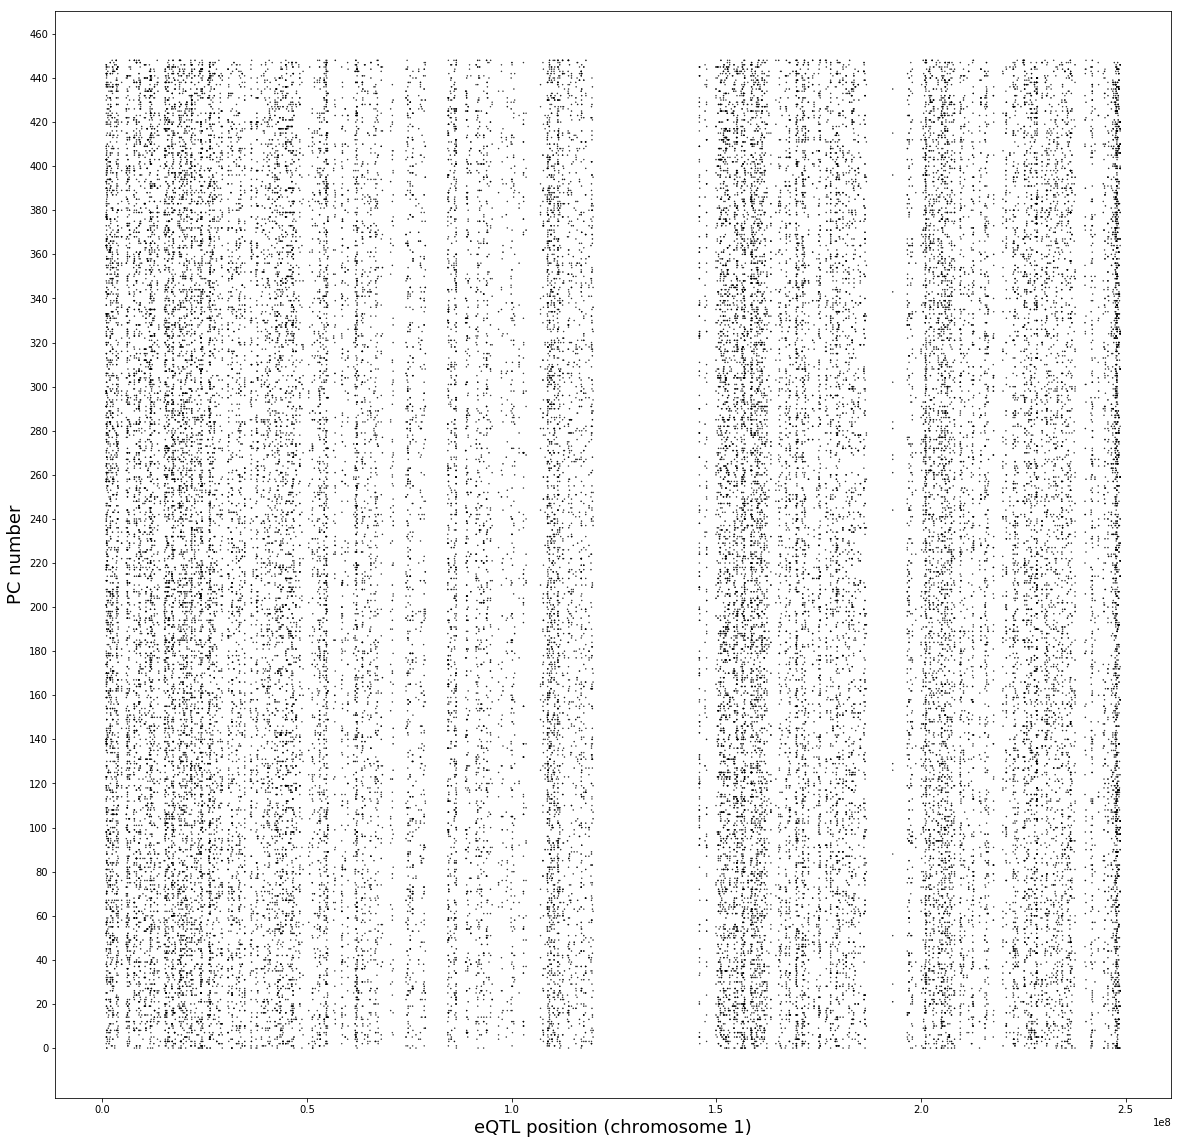

In [74]:
fig, ax = plt.subplots(figsize=(20, 20))
for snp, pcs in nerve_pcs.iterrows():
#     print(snp)
    x_pos = [int(snp.split('_')[1])]*len(pcs)
    y_pos = []
    size = []
    
    for name, pvalue in pcs.items():
        pc_num = name.split('PC')[1]
        y_pos.append(pc_num)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
#         print(snp, name, pvalue, size)
    plt.scatter(x_pos, y_pos, s=size, color='black')
# ax.set_xticks(labels_pos)
# ax.set_xticklabels(labels)
ax.set_yticks(pc_labels)
ax.set_yticklabels(pc_labels)
plt.xlabel('eQTL position (chromosome 1)', fontsize=18)
plt.ylabel('PC number', fontsize=18)

In [75]:
nerve_pcs = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve-Tibial_Euro/chr7/expressionPCs/matrixeQTL_PCs_pvalue_converted_chr7', sep='\t', index_col=0)

In [77]:
nerve_pcs

PC0       PC1      PC10     PC100     PC101     PC102  \
SNP                                                                          
chr7_100057066  0.398641  0.021261  0.653253  0.776864  0.796956  0.609602   
chr7_100095455  0.437847  0.031452  0.883978  0.781311  0.740201  0.632298   
chr7_100099174  0.796676  0.483818  0.535470  0.544276  0.861137  0.511285   
chr7_100105324  0.528253  0.870053  0.095458  0.495547  0.837042  0.274710   
chr7_100149507  0.977964  0.537718  0.251742  0.946828  0.531767  0.638198   
...                  ...       ...       ...       ...       ...       ...   
chr7_99876804   0.568664  0.235089  0.302704  0.116211  0.824585  0.489406   
chr7_99892567   0.417860  0.495854  0.819045  0.022060  0.256723  0.087813   
chr7_99903276   0.898744  0.118826  0.409186  0.045227  0.351453  0.415208   
chr7_99903288   0.928660  0.081093  0.420450  0.835725  0.715970  0.834604   
chr7_99971771   0.099651  0.282516  0.089503  0.565992  0.303200  0.931472   

                   PC103     PC104     PC105     PC106  ...      PC90  \
SNP                                                     ...             
chr7_100057066  0.290086  0.358766  0.984863  0.475346  ...  0.935018   
chr7_100095455  0.573858  0.386043  0.566457  0.420760  ...  0.811118   
chr7_100099174  0.844403  0.281497  0.102550  0.209512  ...  0.955181   
chr7_100105324  0.921007  0.863137  0.751824  0.869017  ...  0.497807   
chr7_100149507  0.470933  0.765091  0.657201  0.981461  ...  0.821540   
...                  ...       ...       ...       ...  ...       ...   
chr7_99876804   0.422570  0.436344  0.687093  0.063857  ...  0.691328   
chr7_99892567   0.808659  0.133486  0.022774  0.249830  ...  0.755864   
chr7_99903276   0.637224  0.521418  0.638282  0.185743  ...  0.940837   
chr7_99903288   0.287636  0.706807  0.500654  0.249298  ...  0.951896   
chr7_99971771   0.737783  0.144224  0.976531  0.165570  ...  0.778069   

                    PC91      PC92      PC93      PC94      PC95      PC96  \
SNP                                                                          
chr7_100057066  0.308708  0.515482  0.201965  0.963659  0.480427  0.464836   
chr7_100095455  0.348057  0.800872  0.276081  0.443944  0.302017  0.049847   
chr7_100099174  0.746985  0.787234  0.938062  0.488935  0.031421  0.234611   
chr7_100105324  0.674183  0.854562  0.109841  0.646935  0.080747  0.795936   
chr7_100149507  0.396503  0.968283  0.300530  0.412982  0.018795  0.385905   
...                  ...       ...       ...       ...       ...       ...   
chr7_99876804   0.026153  0.333236  0.331615  0.965576  0.979798  0.882941   
chr7_99892567   0.677998  0.591631  0.956482  0.582598  0.131884  0.305163   
chr7_99903276   0.025271  0.476272  0.659493  0.752379  0.923416  0.323876   
chr7_99903288   0.076392  0.438998  0.480930  0.815524  0.337381  0.909241   
chr7_99971771   0.658603  0.999429  0.747108  0.098047  0.265931  0.065485   

                    PC97      PC98      PC99  
SNP                                           
chr7_100057066  0.816011  0.221602  0.588618  
chr7_100095455  0.625870  0.250577  0.902349  
chr7_100099174  0.264002  0.526641  0.896642  
chr7_100105324  0.853477  0.488727  0.402375  
chr7_100149507  0.235426  0.042490  0.663041  
...                  ...       ...       ...  
chr7_99876804   0.724086  0.365124  0.096150  
chr7_99892567   0.818169  0.351465  0.236155  
chr7_99903276   0.576163  0.267774  0.110406  
chr7_99903288   0.818174  0.102074  0.525398  
chr7_99971771   0.649216  0.593582  0.846714  

[1122 rows x 449 columns]

In [78]:
pval_flat = np.array(nerve_pcs).flatten()
pvals_adj = statsmodels.stats.multitest.multipletests(pval_flat, alpha=0.05, method='fdr_bh')
pvalues_adjusted = pvals_adj[1].reshape((1122, 449))
pvalues_adj_df = pd.DataFrame(pvalues_adjusted, columns=nerve_pcs.columns, index=nerve_pcs.index)

In [79]:
pc_labels = []
for pc in pvalues_adj_df.columns:
    pc_num = int(pc.split('PC')[1])
    if pc_num % 20 == 0:
        pc_labels.append(pc_num)
pc_labels.append(460)

Text(0, 0.5, 'PC number')

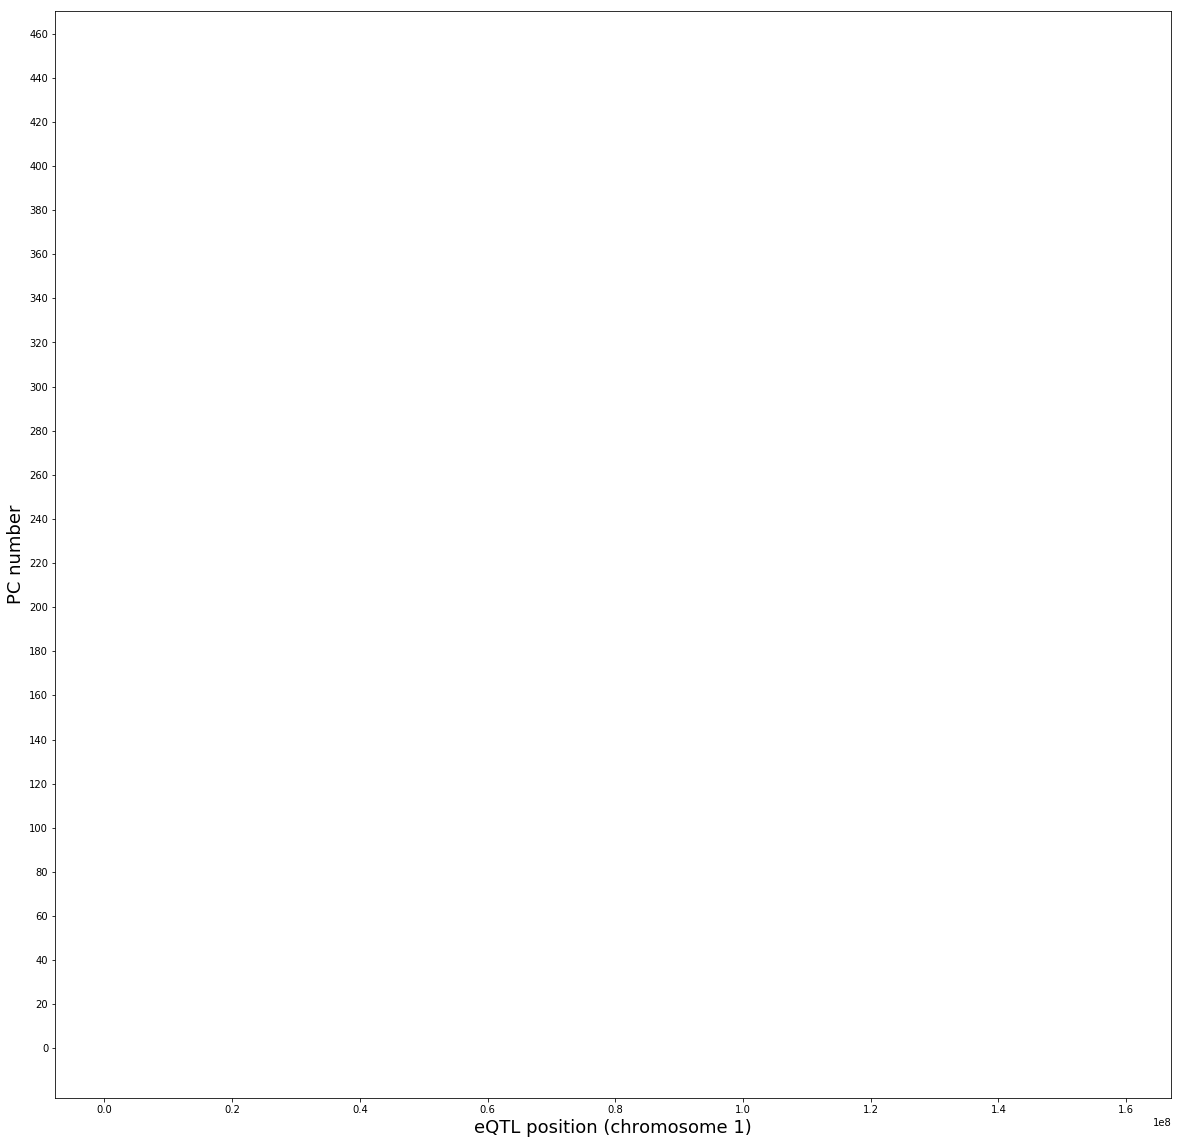

In [80]:
fig, ax = plt.subplots(figsize=(20, 20))
for snp, pcs in pvalues_adj_df.iterrows():
#     print(snp)
    x_pos = [int(snp.split('_')[1])]*len(pcs)
    y_pos = []
    size = []
    
    for name, pvalue in pcs.items():
        pc_num = name.split('PC')[1]
        y_pos.append(pc_num)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
#         print(snp, name, pvalue, size)
    plt.scatter(x_pos, y_pos, s=size, color='black')
# ax.set_xticks(labels_pos)
# ax.set_xticklabels(labels)
ax.set_yticks(pc_labels)
ax.set_yticklabels(pc_labels)
plt.xlabel('eQTL position (chromosome 1)', fontsize=18)
plt.ylabel('PC number', fontsize=18)

Text(0, 0.5, 'PC number')

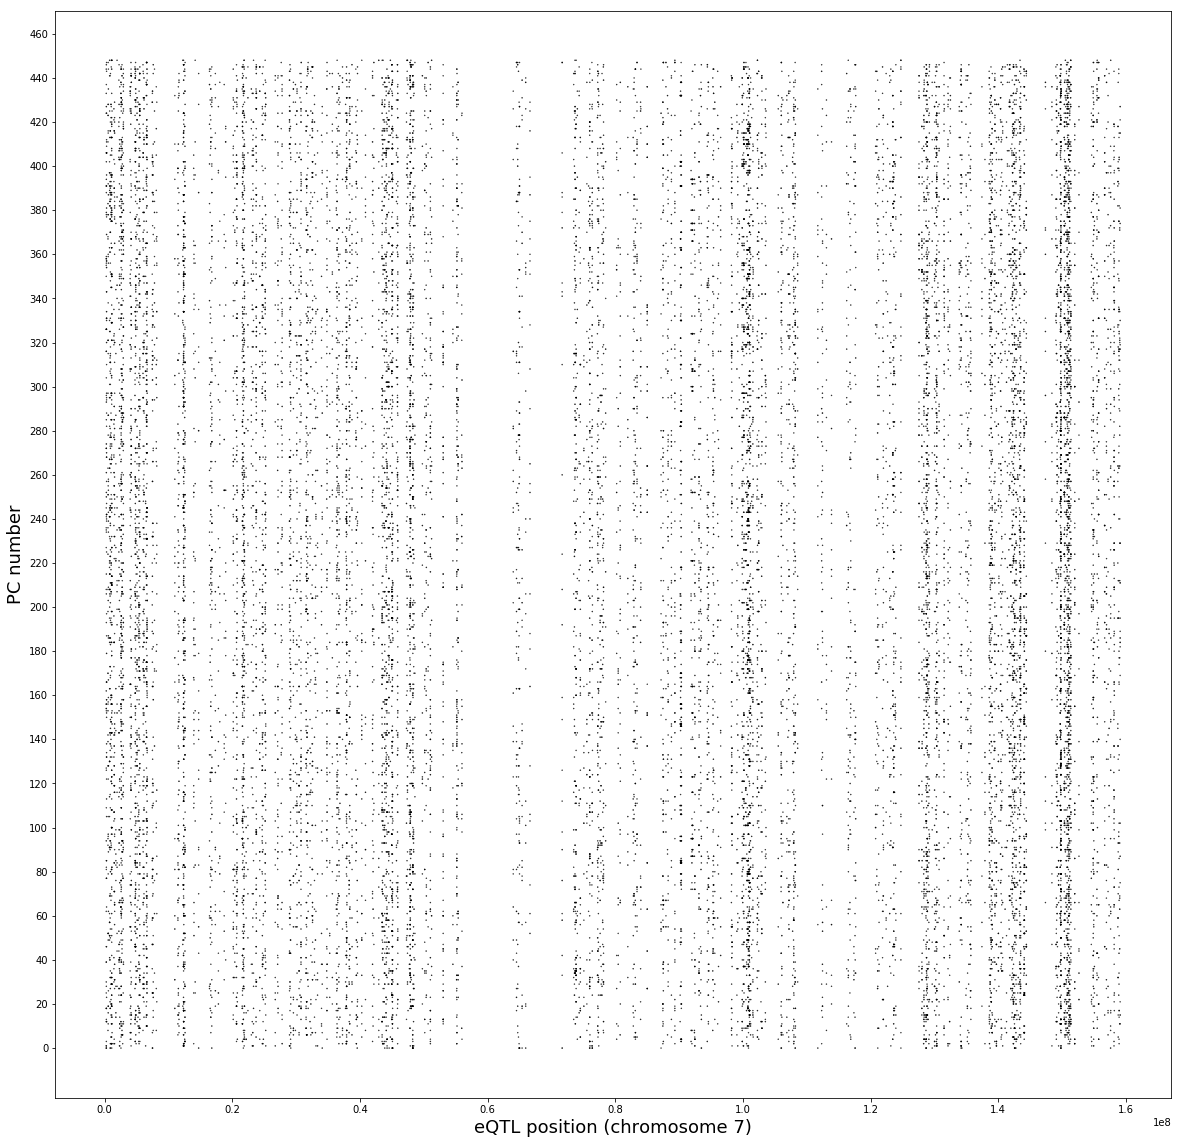

In [82]:
fig, ax = plt.subplots(figsize=(20, 20))
for snp, pcs in nerve_pcs.iterrows():
#     print(snp)
    x_pos = [int(snp.split('_')[1])]*len(pcs)
    y_pos = []
    size = []
    
    for name, pvalue in pcs.items():
        pc_num = name.split('PC')[1]
        y_pos.append(pc_num)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
#         print(snp, name, pvalue, size)
    plt.scatter(x_pos, y_pos, s=size, color='black')
# ax.set_xticks(labels_pos)
# ax.set_xticklabels(labels)
ax.set_yticks(pc_labels)
ax.set_yticklabels(pc_labels)
plt.xlabel('eQTL position (chromosome 7)', fontsize=18)
plt.ylabel('PC number', fontsize=18)

In [161]:
expression = pd.read_csv('/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Nerve-Tibial_Euro/chr1_gene_intersect.tsv', sep='\t', index_col=0)

In [162]:
pca, expression_trans_pca, PC_trans_df = perform_pca('/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Nerve-Tibial_Euro/chr1_gene_intersect.tsv')

In [84]:
PC_trans_df

GTEX-111CU   GTEX-111FC   GTEX-111VG    GTEX-111YS    GTEX-1192X  \
PC0   14328.863689  1586.212670 -4886.309370  14854.224363 -16605.107451   
PC1   -6184.133653  6956.955705 -7267.492457    204.021434  -1567.398277   
PC2   -4423.811702  1063.179125  4601.734261  -8108.642448   -773.639513   
PC3    8282.863116  2051.174449 -1168.089235   4742.149224   4838.934356   
PC4    2956.399462 -1345.165158   492.985816   1063.609952    174.217013   
...            ...          ...          ...           ...           ...   
PC95    -26.850488   -89.795120    30.624236     -5.082560     36.592821   
PC96    136.301843   113.462525  -100.957177    188.366313   -103.362733   
PC97     76.880403    -7.504740   173.671927    158.243041   -119.815816   
PC98    -90.526952    88.734691   -29.847869    -11.064763    -70.836705   
PC99     96.340039   -30.943098    59.597059    -21.559335    108.510203   

       GTEX-11DXX    GTEX-11EI6   GTEX-11EQ9    GTEX-11GS4    GTEX-11GSO  ...  \
PC0  -5976.770717 -21662.042742  6707.778305 -17222.883543 -16224.168985  ...   
PC1  -4237.777161   5054.051218 -1574.609736  28353.222951 -15907.214513  ...   
PC2   9171.484160  -4330.893256 -3819.425463   3562.333703  -2305.164638  ...   
PC3   6152.880461   3408.125143  4489.413796  -6418.938445    699.511431  ...   
PC4    581.379251   -960.107904   805.012396  77109.849629   2612.194853  ...   
...           ...           ...          ...           ...           ...  ...   
PC95   191.616565   -208.550723    62.120291      3.594148    147.119768  ...   
PC96  -204.711908     44.596664   -26.693061      0.309336   -188.615506  ...   
PC97   -96.649718    238.790157   -45.422703      4.809344   -126.235067  ...   
PC98  -149.081085     63.556136   113.233126     -1.294665     46.598787  ...   
PC99  -106.214162     40.804299  -215.565872      4.457870    -28.171662  ...   

        GTEX-ZVE2    GTEX-ZVT3     GTEX-ZVZP     GTEX-ZXES     GTEX-ZXG5  \
PC0   8317.323356  -906.068515  23819.784190  18871.873752 -10057.992622   
PC1  -4750.363163  4786.402243 -12205.199884    158.887405  -1854.884111   
PC2  -1013.492476  5560.863225   3647.440476   -191.749417   2344.694912   
PC3     32.357160 -5137.922710   4245.380952   1250.577137   4925.847892   
PC4   1050.752425 -1309.622222   2600.795043    635.724172    137.159150   
...           ...          ...           ...           ...           ...   
PC95   155.038095    47.420366    -79.912317     27.311802    233.826710   
PC96    97.163984   179.896585     69.232600   -129.822733      5.081613   
PC97   219.017083  -144.889908     53.409501    140.352892   -194.058518   
PC98   -16.068208    18.021241    144.302225     93.690357   -131.194595   
PC99   198.822069    -9.805480    -30.740384    109.110315    177.863223   

         GTEX-ZYFD     GTEX-ZYFG     GTEX-ZYT6     GTEX-ZYVF    GTEX-ZZ64  
PC0   31487.581918  18265.448999  11596.377125 -25141.009755  4389.510961  
PC1    1321.816511  -6083.554217   2482.386482  12942.489993  3894.003487  
PC2    9005.300115  -2569.937080   5090.526093   1737.091896 -1632.929239  
PC3    3411.078005   9359.098081   -151.885985   5621.176141  1314.636888  
PC4     785.495371   2250.725145   -616.102058  -1819.663315  -487.312621  
...            ...           ...           ...           ...          ...  
PC95    263.934981    -60.468800      2.727117     94.671202   130.180980  
PC96     35.409538     17.626432    -61.554788     60.282855   -47.524509  
PC97    106.802296   -212.426922   -160.060976    111.109619    31.749962  
PC98     44.280215    -84.557490    129.934104    238.789397    54.958429  
PC99   -228.273198    -14.279494    -74.197087    102.854879    -4.667953  

[100 rows x 449 columns]

In [95]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [158]:
len(pca.explained_variance_)

449

In [160]:
pca.components_.T.shape

(15431, 449)

### Get gene annotations to map ENS00 to gene name

In [195]:
data = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/gencode.v26.GRCh38.genes.gtf', skiprows=6, sep='\t', names=['chr', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'])

In [196]:
data

chr   source     feature  start    end score strand frame  \
0       chr1   HAVANA        gene  11869  14403     .      +     .   
1       chr1   HAVANA  transcript  11869  14403     .      +     .   
2       chr1   HAVANA        exon  11869  12227     .      +     .   
3       chr1   HAVANA        exon  12613  12721     .      +     .   
4       chr1   HAVANA        exon  12975  13052     .      +     .   
...      ...      ...         ...    ...    ...   ...    ...   ...   
441066  chrM  ENSEMBL  transcript  15888  15953     .      +     .   
441067  chrM  ENSEMBL        exon  15888  15953     .      +     .   
441068  chrM  ENSEMBL        gene  15956  16023     .      -     .   
441069  chrM  ENSEMBL  transcript  15956  16023     .      -     .   
441070  chrM  ENSEMBL        exon  15956  16023     .      -     .   

                                                attribute  
0       gene_id "ENSG00000223972.5"; transcript_id "EN...  
1       gene_id "ENSG00000223972.5"; transcript_id "EN...  
2       gene_id "ENSG00000223972.5"; transcript_id "EN...  
3       gene_id "ENSG00000223972.5"; transcript_id "EN...  
4       gene_id "ENSG00000223972.5"; transcript_id "EN...  
...                                                   ...  
441066  gene_id "ENSG00000210195.2"; transcript_id "EN...  
441067  gene_id "ENSG00000210195.2"; transcript_id "EN...  
441068  gene_id "ENSG00000210196.2"; transcript_id "EN...  
441069  gene_id "ENSG00000210196.2"; transcript_id "EN...  
441070  gene_id "ENSG00000210196.2"; transcript_id "EN...  

[441071 rows x 9 columns]

In [200]:
gene_info = {}
for index, row in data.iterrows():
    if row['feature'] in ['gene', 'pseudogene']:
        values = row['attribute'].split(';')
        gene_id = values[0].split('"')[1]
        gene_name = values[3].split('"')[1]
        gene_info[gene_id] = gene_name


In [202]:
len(gene_info)

56200

In [216]:
f = open("/storage/cynthiawu/trans_eQTL/GTex.v8/gencode.v26.GRCh38.genes.annotations", "w")

for ens_id, name in gene_info.items():
    f.write(f'{ens_id}\t{name}\n')
    
f.close()

In [217]:
path = "/storage/cynthiawu/trans_eQTL/GTex.v8/gencode.v26.GRCh38.genes.annotations"
gene_dict = {}
with open(path) as f:
    for line in f:
        values = line.strip().split('\t')
        gene_dict[values[0]] = values[1]

In [204]:
annotate = []
for value in list(expression.index):
    if value in gene_info:
        annotate.append(gene_info[value])
    else:
        annotate.append(value)

In [220]:
expression

GTEX-111CU    GTEX-111FC    GTEX-111VG    GTEX-111YS  \
id                                                                           
ENSG00000184731.5       0.045022      0.108957     -0.175106     -0.283014   
ENSG00000035115.21     -0.629776     -0.805857     -1.646673     -1.204952   
ENSG00000143727.15     -6.684139      0.639629      1.276447     -5.510937   
ENSG00000189292.15     -2.428753      4.293762    -12.473812    -23.573032   
ENSG00000151353.14     -2.022602     -0.262869     -1.111460      3.207954   
...                          ...           ...           ...           ...   
ENSG00000212907.2   12158.952148   8772.957031   7278.111328  14478.851562   
ENSG00000198886.2   26393.832031  25573.941406  20653.947266  33263.847656   
ENSG00000198786.2    3352.301270    302.685059   1221.039551   3328.313965   
ENSG00000198695.2    3526.660156    886.596069   2634.265625   4959.406738   
ENSG00000198727.2   20620.515625  17410.730469  13490.627930  21290.630859   

                      GTEX-1192X    GTEX-11DXX    GTEX-11EI6    GTEX-11EQ9  \
id                                                                           
ENSG00000184731.5      -0.013125      0.111962      0.037563     -0.200696   
ENSG00000035115.21     -0.273656      0.709309      0.899197      0.378065   
ENSG00000143727.15      5.458237     -1.087124      2.155010     -0.383877   
ENSG00000189292.15    -26.601665      5.154659      2.884886      5.543388   
ENSG00000151353.14     -1.307545      0.217781      0.291925      2.491442   
...                          ...           ...           ...           ...   
ENSG00000212907.2    6471.020508   5266.373535   5660.943848  10338.910156   
ENSG00000198886.2   16303.865234  14543.911133  16783.900391  26983.861328   
ENSG00000198786.2    -820.107178   -477.227295   -518.676025   2265.787109   
ENSG00000198695.2    -592.541504    445.071777   -171.805420   3349.486572   
ENSG00000198727.2   12750.518555  14570.447266   9187.657227  18230.630859   

                      GTEX-11GS4    GTEX-11GSO  ...     GTEX-ZVE2  \
id                                              ...                 
ENSG00000184731.5      -0.009489     -0.296018  ...      0.228987   
ENSG00000035115.21      0.051313     -0.194887  ...      0.460132   
ENSG00000143727.15      0.128967      1.657597  ...     -4.799282   
ENSG00000189292.15     -1.092037    -18.391689  ...      2.311737   
ENSG00000151353.14      0.196800     -0.251934  ...     -1.896576   
...                          ...           ...  ...           ...   
ENSG00000212907.2    6264.531738   7317.895996  ...  12188.894531   
ENSG00000198886.2   16835.619141  16803.892578  ...  29683.847656   
ENSG00000198786.2    -232.878418   -476.488770  ...    698.493896   
ENSG00000198695.2     684.532471   -275.669434  ...   1286.982300   
ENSG00000198727.2   10353.613281  12320.651367  ...  16640.535156   

                       GTEX-ZVT3     GTEX-ZVZP     GTEX-ZXES     GTEX-ZXG5  \
id                                                                           
ENSG00000184731.5       0.238658     -0.043683      0.119623      0.086498   
ENSG00000035115.21      1.574205     -0.757219     -0.121109      2.190186   
ENSG00000143727.15      1.570728     -3.654850     -3.510647     -4.218716   
ENSG00000189292.15     -5.573610    -29.352879    -27.286232      1.092823   
ENSG00000151353.14     -0.345449     -3.560055      0.467836     -1.417389   
...                          ...           ...           ...           ...   
ENSG00000212907.2    8608.920898  10509.020508  12418.894531   4009.044922   
ENSG00000198886.2   21803.923828  32673.878906  29053.853516  18913.929688   
ENSG00000198786.2    2619.961182   1742.907715   3759.396240   -560.281250   
ENSG00000198695.2    4152.260742   3590.618896   6077.062500   1335.406128   
ENSG00000198727.2   13700.670898  23840.593750  21110.619141  15570.639648   

                       GTEX-ZYFD     GTEX-ZYFG     GTEX-ZYT6     GTEX-ZYVF  \
i

In [207]:
col = ['PC' + str(i) for i in range(len(pca.explained_variance_))]
loadings = pd.DataFrame(pca.components_.T* np.sqrt(pca.explained_variance_), columns=col, index=annotate)

In [208]:
loadings

PC0         PC1          PC2         PC3         PC4  \
FAM110C    -0.017317    0.008603    -0.004574   -0.001157   -0.002882   
SH3YL1     -0.359198    0.072224     0.027078    0.007892   -0.029868   
ACP1       -2.133002    0.224373    -0.093177   -0.187954   -0.155586   
ALKAL2     -3.838795   -1.466147     1.377627   -1.674555    0.028700   
TMEM18     -0.902427    0.177839    -0.033971   -0.063643   -0.077077   
...              ...         ...          ...         ...         ...   
MT-ND4L  2769.416366  439.611860 -1091.861871 -674.990894 -207.206341   
MT-ND4   6737.893116  452.365776 -2560.313007 -418.912578 -136.256664   
MT-ND5   1159.585302   -6.673880  -287.616417 -568.680155  -41.899638   
MT-ND6   1387.698596 -143.659340  -192.955783 -753.313677    4.900071   
MT-CYB   4101.642233   28.093804  -112.898608  610.437171  -18.773093   

                PC5          PC6         PC7         PC8         PC9  ...  \
FAM110C    0.011456    -0.003620    0.005260    0.000653    0.011698  ...   
SH3YL1    -0.020328    -0.089988    0.114245   -0.050658    0.022321  ...   
ACP1       0.063132     0.080433    0.464601   -0.048128    0.037531  ...   
ALKAL2     1.025278    -2.295546    1.123699    0.470752    0.257446  ...   
TMEM18    -0.059147    -0.024712    0.189305    0.164251    0.096899  ...   
...             ...          ...         ...         ...         ...  ...   
MT-ND4L   20.952074   613.987080  276.470947  -83.081806  110.126651  ...   
MT-ND4   554.623043  1264.800125   85.827014 -147.380534 -301.633942  ...   
MT-ND5  -203.298783  -418.957154  -38.785096 -201.503122   86.195429  ...   
MT-ND6  -152.426537  -909.519548 -265.443114 -223.930852  -20.514373  ...   
MT-CYB  -402.238723   240.992586  -69.203673 -810.079878   80.118214  ...   

            PC439     PC440     PC441     PC442     PC443     PC444     PC445  \
FAM110C -0.012817 -0.007390 -0.021424  0.016047 -0.004919 -0.012160 -0.008433   
SH3YL1   0.025050  0.051635 -0.016571  0.018002  0.063257  0.005959  0.008810   
ACP1    -0.053562 -0.109935 -0.123480  0.069605 -0.103162 -0.183990 -0.084647   
ALKAL2  -0.567505  0.007329  0.184001 -0.250588 -0.686007 -0.403500 -0.299559   
TMEM18  -0.006743 -0.027744  0.141356  0.015924 -0.015422  0.051517  0.059295   
...           ...       ...       ...       ...       ...       ...       ...   
MT-ND4L  0.008902 -0.010805 -0.010721 -0.011221  0.027837 -0.022032  0.032097   
MT-ND4  -0.013405  0.005646  0.009783  0.000670 -0.009605  0.015323 -0.005564   
MT-ND5  -0.072013  0.111280  0.030386  0.035030 -0.068274  0.112447  0.004537   
MT-ND6   0.045484 -0.074707 -0.004474  0.017249  0.026883 -0.029287 -0.009629   
MT-CYB  -0.012193 -0.011991 -0.030839 -0.009594  0.014012  0.002546  0.005068   

            PC446     PC447         PC448  
FAM110C -0.008292 -0.010346  4.679058e-14  
SH3YL1   0.027957  0.012267 -1.330330e-14  
ACP1    -0.114466  0.021017  2.785218e-14  
ALKAL2  -0.348258  0.210213 -5.773472e-14  
TMEM18  -0.013205 -0.040883  5.251662e-14  
...           ...       ...           ...  
MT-ND4L  0.026709  0.000904  2.457379e-15  
MT-ND4  -0.009717 -0.009976 -1.244322e-15  
MT-ND5  -0.024126 -0.002907 -5.732460e-15  
MT-ND6   0.039525  0.006941  3.426054e-15  
MT-CYB  -0.002038  0.001312  1.096483e-15  

[15431 rows x 449 columns]

In [221]:
loadings.to_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve-Tibial_Euro/chr1/expressionPCs/PCs_loadings_chr1', sep='\t')

In [110]:
pca.explained_variance_[:2]

array([2.11348985e+08, 2.93544060e+07])

In [104]:
loadings

PC1       PC2
id                                    
ENSG00000184731.5  -0.000001  0.000002
ENSG00000035115.21 -0.000025  0.000013
ENSG00000143727.15 -0.000147  0.000041
ENSG00000189292.15 -0.000264 -0.000271
ENSG00000151353.14 -0.000062  0.000033
...                      ...       ...
ENSG00000212907.2   0.190497  0.081140
ENSG00000198886.2   0.463473  0.083494
ENSG00000198786.2   0.079763 -0.001232
ENSG00000198695.2   0.095454 -0.026515
ENSG00000198727.2   0.282135  0.005185

[15431 rows x 2 columns]

In [106]:
pca.explained_variance_.shape

(449,)

In [107]:
pca.components_.shape

(449, 15431)

In [101]:
pca.components_.T[:,:2]

array([[-1.19115037e-06,  1.58792007e-06],
       [-2.47077514e-05,  1.33304245e-05],
       [-1.46720607e-04,  4.14126723e-05],
       ...,
       [ 7.97632091e-02, -1.23180446e-03],
       [ 9.54542051e-02, -2.65153411e-02],
       [ 2.82135472e-01,  5.18530013e-03]])

In [103]:
pca.components_

array([[-1.19115037e-06, -2.47077514e-05, -1.46720607e-04, ...,
         7.97632091e-02,  9.54542051e-02,  2.82135472e-01],
       [ 1.58792007e-06,  1.33304245e-05,  4.14126723e-05, ...,
        -1.23180446e-03, -2.65153411e-02,  5.18530013e-03],
       [-9.55055989e-07,  5.65418930e-06, -1.94567525e-05, ...,
        -6.00586175e-02, -4.02920587e-02, -2.35749209e-02],
       ...,
       [-5.36697062e-04,  1.80944421e-03, -7.40858751e-03, ...,
        -1.56153644e-03,  2.55819346e-03, -1.31899912e-04],
       [-6.78663028e-04,  8.04670419e-04,  1.37862214e-03, ...,
        -1.90720610e-04,  4.55330468e-04,  8.60362590e-05],
       [ 2.08942378e-01, -5.94056235e-02,  1.24373322e-01, ...,
        -2.55981818e-02,  1.52989743e-02,  4.89632154e-03]])

Text(0, 0.5, 'count')

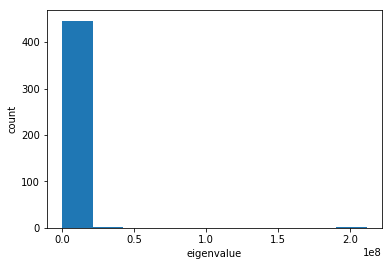

In [112]:
plt.hist(pca.explained_variance_)
plt.xlabel('eigenvalue')
plt.ylabel('count')

In [113]:
pca.explained_variance_

array([2.11348985e+08, 2.93544060e+07, 2.29338350e+07, 1.81099339e+07,
       1.44503256e+07, 1.14231869e+07, 9.39369560e+06, 7.19110301e+06,
       5.89600204e+06, 5.31283553e+06, 4.34954149e+06, 3.43822488e+06,
       2.81481433e+06, 2.54510022e+06, 2.34297821e+06, 1.72366517e+06,
       1.69001355e+06, 1.43685888e+06, 1.40626977e+06, 1.25132359e+06,
       1.07925051e+06, 9.24685795e+05, 7.91667654e+05, 7.35169444e+05,
       7.06357518e+05, 6.15237723e+05, 5.84213292e+05, 4.68386545e+05,
       3.76469337e+05, 3.50984892e+05, 3.11217282e+05, 2.83596180e+05,
       2.40914624e+05, 2.27532553e+05, 2.02227534e+05, 1.95117036e+05,
       1.81446430e+05, 1.66535625e+05, 1.56685120e+05, 1.48149743e+05,
       1.34410624e+05, 1.29674960e+05, 1.26309350e+05, 1.19435288e+05,
       1.06582193e+05, 1.03887306e+05, 9.63477694e+04, 9.47468007e+04,
       8.97872060e+04, 8.21084605e+04, 7.87791779e+04, 7.68928891e+04,
       7.05152501e+04, 6.78087252e+04, 6.58823165e+04, 6.40128563e+04,
      

In [114]:
expression = pd.read_csv('/storage/polo/GTEx_v8_European_only/Nerve-Tibial_Euro/peer_residuals.tsv', sep='\t', index_col=0)

In [115]:
expression

GTEX.111CU    GTEX.111FC    GTEX.111VG    GTEX.111YS  \
ENSG00000186092.4       0.048259      0.019160     -0.145478      0.171940   
ENSG00000187634.11     -2.645998     -1.876636     -1.041262     -1.908307   
ENSG00000188976.10     -8.864655     -3.061615     -0.023590     -5.626869   
ENSG00000187961.13      1.594158     -0.143692     -0.229895      0.406779   
ENSG00000187583.10      0.069548      0.038110      0.394435     -0.018386   
...                          ...           ...           ...           ...   
ENSG00000212907.2   12158.952148   8772.957031   7278.111328  14478.851562   
ENSG00000198886.2   26393.832031  25573.941406  20653.947266  33263.847656   
ENSG00000198786.2    3352.301270    302.685059   1221.039551   3328.313965   
ENSG00000198695.2    3526.660156    886.596069   2634.265625   4959.406738   
ENSG00000198727.2   20620.515625  17410.730469  13490.627930  21290.630859   

                      GTEX.1192X    GTEX.11DXX    GTEX.11EI6    GTEX.11EQ9  \
ENSG00000186092.4      -0.049842      0.030037     -0.077296     -0.072639   
ENSG00000187634.11      0.048825     -0.644641     -2.303968     -0.078533   
ENSG00000188976.10     11.074631     -7.279373      1.178162     -3.749825   
ENSG00000187961.13     -0.617736      0.555145      0.048167      0.632092   
ENSG00000187583.10     -0.221099     -0.181189      0.460650     -0.117168   
...                          ...           ...           ...           ...   
ENSG00000212907.2    6471.020508   5266.373535   5660.943848  10338.910156   
ENSG00000198886.2   16303.865234  14543.911133  16783.900391  26983.861328   
ENSG00000198786.2    -820.107178   -477.227295   -518.676025   2265.787109   
ENSG00000198695.2    -592.541504    445.071777   -171.805420   3349.486572   
ENSG00000198727.2   12750.518555  14570.447266   9187.657227  18230.630859   

                      GTEX.11GS4    GTEX.11GSO  ...     GTEX.ZVE2  \
ENSG00000186092.4      -0.000505     -0.013284  ...     -0.080438   
ENSG00000187634.11      0.011340      0.787927  ...     -1.600266   
ENSG00000188976.10      0.371113      1.224190  ...     -5.852894   
ENSG00000187961.13     -0.003895      0.834848  ...      2.668459   
ENSG00000187583.10      0.002865      0.203060  ...      0.010855   
...                          ...           ...  ...           ...   
ENSG00000212907.2    6264.531738   7317.895996  ...  12188.894531   
ENSG00000198886.2   16835.619141  16803.892578  ...  29683.847656   
ENSG00000198786.2    -232.878418   -476.488770  ...    698.493896   
ENSG00000198695.2     684.532471   -275.669434  ...   1286.982300   
ENSG00000198727.2   10353.613281  12320.651367  ...  16640.535156   

                       GTEX.ZVT3     GTEX.ZVZP     GTEX.ZXES     GTEX.ZXG5  \
ENSG00000186092.4       0.124874     -0.056003     -0.047055     -0.123918   
ENSG00000187634.11      1.925487      0.668566      0.270199      0.803839   
ENSG00000188976.10      7.752342    -10.181099     -4.575611     -9.051497   
ENSG00000187961.13      0.362275     -1.792283      0.040382     -0.990067   
ENSG00000187583.10     -0.370534     -0.002716      0.080500      0.115328   
...                          ...           ...           ...           ...   
ENSG00000212907.2    8608.920898  10509.020508  12418.894531   4009.044922   
ENSG00000198886.2   21803.923828  32673.878906  29053.853516  18913.929688   
ENSG00000198786.2    2619.961182   1742.907715   3759.396240   -560.281250   
ENSG00000198695.2    4152.260742   3590.618896   6077.062500   1335.406128   
ENSG00000198727.2   13700.670898  23840.593750  21110.619141  15570.639648   

                       GTEX.ZYFD     GTEX.ZYFG     GTEX.ZYT6     GTEX.ZYVF  \
ENSG00000186092.4       0.014669     -0.094478      0.040640     -0.144561   
ENSG00000187634.11     -0.780666      0.210454     -3.867660     -1.035812   
ENSG00000188976.10     -6.944416     -1.281609     -0.840725     12.674637   
ENSG00000187961.13      0.099062     -0.655231      0.073309      3.52

## Save significant results from all chr to one file (for matrix eqtl and cpma methods)

In [156]:
path ='/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve-Tibial_Euro/all_chr/chr1/expressionPCs/matrixeQTL_PCs_cpma_converted_pval_chr1'

In [157]:
sig_results = open('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve-Tibial_Euro/all_chr/matrixeQTL_PCs_sig_results', 'a')
threshold = 0.05
method = 1
with open(path) as f:
    header = f.readline()
    sig_results.write(header)
    for line in f:
        values = (line.strip().split('\t'))
        if method == 1:
            if float(values[4]) > threshold:
               break
            sig_results.write(line)
        if method == 2:
            if float(values[2]) <= threshold: 
                sig_results.write(line)
   

In [137]:
pd.DataFrame(sig_results)

0      1                   2                  3  \
0                 SNP   gene                beta             t-stat   
1       chr1_21247362  PC409   0.548682434494416   4.92183824425273   
2      chr1_160155085   PC58   0.363757385248913   4.87829250192883   
3      chr1_206496132  PC392   -0.36620485558245  -4.64418643753291   
4      chr1_205832744  PC410   -0.30935830455121  -4.62382652949591   
...               ...    ...                 ...                ...   
50167  chr1_200589235  PC387  -0.150895496218876  -1.96544237396042   
50168  chr1_111500165  PC165  -0.214602741419019  -1.96544220717252   
50169  chr1_222942898  PC257  -0.228274868381883  -1.96543721029787   
50170  chr1_198735165  PC226   0.183941104490372   1.96543497788759   
50171  chr1_110518047   PC32    0.14901050438252   1.96543355113929   

                          4                  5  
0                   p-value                FDR  
1      1.21895488542473e-06   0.75455578087125  
2      1.50382561470681e-06   0.75455578087125  
3      4.52923959230493e-06  0.944127418316286  
4      4.97444805050464e-06  0.944127418316286  
...                     ...                ...  
50167    0.0499988458645422  0.998070138605571  
50168    0.0499988652201132  0.998070138605571  
50169    0.0499994451054097  0.998070138605571  
50170    0.0499997041775545  0.998070138605571  
50171    0.0499998697528825  0.998070138605571  

[50172 rows x 6 columns]

# Standardization of each PC and finding top genes contributing to each PC

## standarized each PC column to have mean 0 and std 1, so I choose top contributing genes as those >3 or <-3 (3 standard deviations)

In [222]:
loadings = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve-Tibial_Euro/all_chr/PCs_loadings', sep='\t', index_col=0)

In [225]:
loadings

PC0         PC1          PC2         PC3         PC4  \
OR4F5       0.003303    0.000562     0.002342   -0.001502   -0.000214   
SAMD11     -0.309442    0.168797     0.105785    0.153725   -0.049616   
NOC2L      -2.885643    0.829769     0.271672    0.094164   -0.112502   
KLHL17     -0.324663    0.027594    -0.017244    0.076706   -0.022301   
PLEKHN1    -0.017218    0.002280     0.000019   -0.010076    0.001792   
...              ...         ...          ...         ...         ...   
MT-ND4L  2768.915045  485.575643 -1099.511522 -467.485295   40.430744   
MT-ND4   6737.408457  534.807538 -2550.222368 -141.714682   68.007455   
MT-ND5   1158.400896   60.267235  -333.480973 -573.524988   33.431812   
MT-ND6   1386.203207  -56.251255  -260.695384 -785.808231   93.503096   
MT-CYB   4101.146850   36.598337   -97.513366  453.335676 -271.416481   

                PC5         PC6          PC7         PC8         PC9  ...  \
OR4F5      0.003082   -0.003124    -0.002866   -0.000135   -0.000992  ...   
SAMD11    -0.038818   -0.059571     0.007290    0.291969    0.003806  ...   
NOC2L     -0.276559   -0.994212    -0.123405    0.778194    0.134809  ...   
KLHL17     0.026286   -0.049771    -0.065698   -0.050252    0.005375  ...   
PLEKHN1   -0.009767   -0.001279    -0.006974    0.003003    0.002564  ...   
...             ...         ...          ...         ...         ...  ...   
MT-ND4L -348.470750 -168.624039   763.011343   80.647328  -93.484956  ...   
MT-ND4  -520.612271  570.059369  1215.584532   24.499831 -291.757800  ...   
MT-ND5    70.217164 -236.607447  -396.914768   64.265789  -88.223846  ...   
MT-ND6    48.657450 -261.880408  -921.734031  -80.627308 -145.995056  ...   
MT-CYB   614.574578  155.392647    98.150532  279.061968 -597.865531  ...   

            PC439     PC440     PC441     PC442     PC443     PC444     PC445  \
OR4F5   -0.001831 -0.002414  0.001043  0.003141  0.001013  0.002621 -0.000677   
SAMD11  -0.007868  0.084982  0.079931 -0.170363  0.066846 -0.066036 -0.117479   
NOC2L   -0.033080  0.184790 -0.162062 -0.004451 -0.198056 -0.109187  0.003313   
KLHL17  -0.064374 -0.011297  0.000473  0.004276  0.026750 -0.007703 -0.060958   
PLEKHN1 -0.001942  0.000025  0.005457  0.007532  0.018308 -0.002916 -0.009905   
...           ...       ...       ...       ...       ...       ...       ...   
MT-ND4L -0.011712  0.016131 -0.013957 -0.021365 -0.028406 -0.023799 -0.042925   
MT-ND4   0.010178 -0.010229  0.009397  0.007034  0.026318  0.007248  0.015301   
MT-ND5  -0.047783  0.034676  0.078314 -0.092725  0.099169  0.071731  0.086385   
MT-ND6  -0.003073 -0.013119 -0.067867  0.031310 -0.081443 -0.046487 -0.044513   
MT-CYB   0.009460  0.002720  0.007075 -0.012511 -0.002169 -0.006953 -0.017573   

            PC446     PC447         PC448  
OR4F5   -0.000499  0.005853 -8.456632e-14  
SAMD11  -0.001298 -0.022508 -7.912536e-14  
NOC2L   -0.052759 -0.169780  5.437235e-14  
KLHL17   0.051855 -0.011947 -6.858459e-14  
PLEKHN1 -0.009354 -0.003690  3.016565e-14  
...           ...       ...           ...  
MT-ND4L  0.021000  0.003103  2.709938e-15  
MT-ND4   0.008126 -0.006956 -1.347731e-15  
MT-ND5  -0.090630 -0.016038 -6.159535e-15  
MT-ND6   0.029178  0.049431  3.809438e-15  
MT-CYB  -0.010332 -0.025372  1.038133e-15  

[17221 rows x 449 columns]

In [247]:
normalized_loadings = (loadings-loadings.mean())/loadings.std()


In [227]:
normalized_loadings

PC0        PC1        PC2        PC3       PC4        PC5  \
OR4F5    -0.005268   0.010356   0.000304  -0.002871 -0.008351   0.003811   
SAMD11   -0.008090   0.014365   0.003120   0.001746 -0.010034   0.002246   
NOC2L    -0.031334   0.030114   0.007634  -0.000025 -0.012176  -0.006629   
KLHL17   -0.008227   0.011000  -0.000229  -0.000545 -0.009103   0.004677   
PLEKHN1  -0.005453   0.010397   0.000241  -0.003126 -0.008283   0.003331   
...            ...        ...        ...        ...       ...        ...   
MT-ND4L  24.977213  11.580548 -29.923845 -13.910067  1.368729 -13.006059   
MT-ND4   60.782909  12.753636 -69.406102  -4.218703  2.307993 -19.432764   
MT-ND5   10.446364   1.446379  -9.075711 -17.064647  1.130345   2.625173   
MT-ND6   12.501708  -1.330002  -7.094793 -23.379870  3.176376   1.820265   
MT-CYB   36.997262   0.882401  -2.653664  13.483476 -9.252802  22.948130   

               PC6        PC7        PC8        PC9  ...     PC439     PC440  \
OR4F5     0.003455   0.014392  -0.021201   0.003690  ... -0.000626 -0.017821   
SAMD11    0.001151   0.014827  -0.006684   0.003952  ... -0.044126  0.618334   
NOC2L    -0.037010   0.009219   0.017481   0.011092  ... -0.225792  1.344837   
KLHL17    0.001551   0.011695  -0.023692   0.004037  ... -0.451277 -0.082480   
PLEKHN1   0.003531   0.014215  -0.021045   0.003884  ... -0.001425 -0.000071   
...            ...        ...        ...        ...  ...       ...       ...   
MT-ND4L  -6.881155  32.758581   3.986961  -5.091517  ... -0.071823  0.117163   
MT-ND4   23.278493  52.180424   1.196442 -15.898089  ...  0.085903 -0.074711   
MT-ND5   -9.656845 -17.018789   3.172802  -4.804768  ... -0.331732  0.252157   
MT-ND6  -10.688712 -39.541018  -4.028355  -7.953503  ... -0.009576 -0.095745   
MT-CYB    6.348097   4.226572  13.848128 -32.582045  ...  0.080735  0.019548   

            PC441     PC442     PC443     PC444     PC445     PC446     PC447  \
OR4F5    0.011919  0.034590  0.001706  0.016599 -0.005359 -0.024567  0.034838   
SAMD11   0.589316 -1.249962  0.490613 -0.501962 -0.893710 -0.030690 -0.183948   
NOC2L   -1.181874 -0.021623 -1.476662 -0.827888  0.024988 -0.424879 -1.320050   
KLHL17   0.007751  0.042994  0.192839 -0.061377 -0.463833  0.376472 -0.102477   
PLEKHN1  0.044228  0.067094  0.130144 -0.025223 -0.075539 -0.092398 -0.038776   
...           ...       ...       ...       ...       ...       ...       ...   
MT-ND4L -0.097867 -0.146844 -0.216769 -0.182950 -0.326683  0.140118  0.013625   
MT-ND4   0.073065  0.063413  0.189629  0.051547  0.116163  0.041499 -0.063970   
MT-ND5   0.577478 -0.675160  0.730653  0.538591  0.656803 -0.714978 -0.134037   
MT-ND6  -0.492440  0.243139 -0.610644 -0.354308 -0.338761  0.202764  0.371013   
MT-CYB   0.056070 -0.081295 -0.021925 -0.055711 -0.133866 -0.099885 -0.206042   

             PC448  
OR4F5   -49.789908  
SAMD11  -46.584027  
NOC2L    32.074533  
KLHL17  -40.373271  
PLEKHN1  17.811636  
...            ...  
MT-ND4L   1.634380  
MT-ND4   -0.756451  
MT-ND5   -3.591627  
MT-ND6    2.282220  
MT-CYB    0.649331  

[17221 rows x 449 columns]

In [251]:
sorted(normalized_loadings['PC0'], reverse=False)

[-19.23462524801961,
 -4.9424631404868276,
 -3.229549287202969,
 -3.198116475920539,
 -3.1539382597535903,
 -2.7248877179155993,
 -2.6809347756135105,
 -2.371433017371423,
 -2.273457856063623,
 -2.0306751908635285,
 -1.9284062278492708,
 -1.9281975519757564,
 -1.8972757079031595,
 -1.823729705336285,
 -1.8055681991723946,
 -1.8050810718305537,
 -1.794196460706969,
 -1.7160673813183334,
 -1.7093788294559635,
 -1.7051454067791678,
 -1.6539960515361143,
 -1.5717847012919492,
 -1.5227171162792867,
 -1.4921174639433765,
 -1.4537187448140365,
 -1.4032041263857995,
 -1.3598372779703392,
 -1.3484621601500129,
 -1.3421630911877533,
 -1.1878168568000034,
 -1.1693957743755425,
 -1.1363463532734315,
 -1.1301585097185383,
 -1.1130878748562276,
 -1.0677141929600056,
 -1.0667763014035223,
 -1.0345992424489574,
 -1.0221143691562344,
 -1.0161584569419932,
 -0.9750562028531402,
 -0.9650422809627226,
 -0.9582452348914253,
 -0.9307995678722116,
 -0.8943054468476894,
 -0.8796436842180929,
 -0.8778710477497

In [294]:
pcs = []
positive = []
negative = []
for column in normalized_loadings:
#     print((normalized_loadings[column] > 3))
    pcs.append(column)
    positive.append(list(normalized_loadings.loc[normalized_loadings[column] > 3].index))
    negative.append(list(normalized_loadings.loc[normalized_loadings[column] < -3].index))

In [432]:
(positive[407])

['ISG15',
 'VWA1',
 'DHRS3',
 'ID3',
 'RPL11',
 'EXTL1',
 'HMGN2',
 'YBX1',
 'CCDC163',
 'PRDX1',
 'PODN',
 'GSTM1',
 'CTSK',
 'S100A9',
 'NES',
 'CRABP2',
 'DUSP23',
 'TAGLN2',
 'TSTD1',
 'RGS2',
 'PPP1R12B',
 'CHI3L1',
 'LPIN1',
 'TRIB2',
 'CRIM1',
 'RPS27A',
 'ACTG2',
 'BIN1',
 'LIMS2',
 'MZT2B',
 'ITGA6',
 'FRZB',
 'AOX1',
 'EEF1B2',
 'FN1',
 'RPL37A',
 'TMBIM1',
 'WNT6',
 'SERPINE2',
 'GPC1',
 'CIDEC',
 'TIMP4',
 'GALNT15',
 'EIF1B',
 'CTNNB1',
 'IP6K2',
 'PCBP4',
 'GAP43',
 'H1FX',
 'IL20RB',
 'UVSSA',
 'ANXA3',
 'HNRNPDL',
 'SPARCL1',
 'BDH2',
 'C7',
 'PIK3R1',
 'BTF3',
 'NSA2',
 'THBS4',
 'CAST',
 'GFRA3',
 'HBEGF',
 'SMIM3',
 'DUSP1',
 'HIST1H1C',
 'MICA',
 'HLA-DQA2',
 'PSMB9',
 'ITPR3',
 'RPL10A',
 'PI16',
 'PGC',
 'VEGFA',
 'LMBRD1',
 'OGFRL1',
 'SERINC1',
 'GINM1',
 'SLC22A3',
 'THBS2',
 'MICALL2',
 'INTS1',
 'RAC1',
 'HOXA5',
 'SCRN1',
 'RHBDD2',
 'AZGP1',
 'HILPDA',
 'PRSS1',
 'CTSB',
 'SCARA5',
 'TACC1',
 'C8orf4',
 'PABPC1',
 'COL14A1',
 'NDRG1',
 'PLEC',
 'RPS6',
 'EN

In [296]:
f = open("/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve-Tibial_Euro/all_chr/PCs_loadings_topgenes", "w")
f.write(f'PC\tPositive_corr\tNegative_corr\n')
for i in range(len(pcs)):
    f.write(f'{pcs[i]}\t{positive[i]}\t{negative[i]}\n')
    
f.close()

In [298]:
pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve-Tibial_Euro/all_chr/PCs_loadings_topgenes', sep='\t', index_col=0)

Positive_corr  \
PC                                                         
PC0    ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-A...   
PC1    ['MPZ', 'SPARC', 'ACTB', 'CPA1', 'PRSS1', 'PRS...   
PC2    ['S100A6', 'RPL9', 'CXCL14', 'CD74', 'HLA-B', ...   
PC3    ['PLA2G2A', 'GLUL', 'TMSB10', 'GPX3', 'RPS18',...   
PC4    ['TXNIP', 'GLUL', 'APOD', 'GPX3', 'CPA1', 'PRS...   
...                                                  ...   
PC444  ['PLOD1', 'NCMAP', 'EXTL1', 'HMGN2', 'IFI6', '...   
PC445  ['RBP7', 'NBL1', 'NCMAP', 'HMGN2', 'EIF3I', 'A...   
PC446  ['VWA1', 'ERRFI1', 'NPPA', 'RPA2', 'PTPRU', 'M...   
PC447  ['MEGF6', 'TPRG1L', 'PARK7', 'CLSTN1', 'HSPG2'...   
PC448  ['NOC2L', 'PLEKHN1', 'RNF223', 'SDF4', 'UBE2J2...   

                                           Negative_corr  
PC                                                        
PC0           ['APOD', 'CD74', 'RPS18', 'IFITM3', 'FTL']  
PC1    ['ANGPTL7', 'TXNIP', 'S100A6', 'RPS27', 'GLUL'...  
PC2    ['PLA2G2A', 'TXNIP', 'MPZ', 'GLUL', 'APOD', 'G...  
PC3    ['MPZ', 'APOD', 'SPARC', 'GSN', 'PTGDS', 'PMP2...  
PC4    ['MPZ', 'SPARC', 'FTH1', 'PMP22', 'FTL', 'S100...  
...                                                  ...  
PC444  ['MXRA8', 'EXOSC10', 'HSPG2', 'C1QB', 'RSRP1',...  
PC445  ['SKI', 'HSPG2', 'C1QA', 'RSRP1', 'EXTL1', 'MA...  
PC446  ['RBP7', 'SRSF4', 'COL16A1', 'CAP1', 'TIE1', '...  
PC447  ['DHRS3', 'NBL1', 'RPL11', 'MAP3K6', 'TMEM35B'...  
PC448  ['OR4F5', 'SAMD11', 'KLHL17', 'PERM1', 'HES4',...  

[449 rows x 2 columns]

In [287]:
positive

('MT-ND1',
 'MT-ND2',
 'MT-CO1',
 'MT-CO2',
 'MT-ATP8',
 'MT-ATP6',
 'MT-CO3',
 'MT-ND3',
 'MT-ND4L',
 'MT-ND4',
 'MT-ND5',
 'MT-ND6',
 'MT-CYB')

In [289]:
all_enriched

[('MT-ND1',
  'MT-ND2',
  'MT-CO1',
  'MT-CO2',
  'MT-ATP8',
  'MT-ATP6',
  'MT-CO3',
  'MT-ND3',
  'MT-ND4L',
  'MT-ND4',
  'MT-ND5',
  'MT-ND6',
  'MT-CYB'),
 ('APOD', 'CD74', 'RPS18', 'IFITM3', 'FTL')]

In [228]:
# normalized_loadings = (loadings-loadings.min())/(loadings.max()-loadings.min())
# loadings_abs = loadings.abs()
# normalized_loadings_abs = (loadings_abs-loadings_abs.min())/(loadings_abs.max()-loadings_abs.min())


In [435]:
nerve_topgenes = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve-Tibial_Euro/all_chr/PCs_loadings_topgenes', sep='\t', index_col=0)

In [436]:
nerve_topgenes

Positive_corr  \
PC                                                         
PC0    ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-A...   
PC1    ['MPZ', 'SPARC', 'ACTB', 'CPA1', 'PRSS1', 'PRS...   
PC2    ['S100A6', 'RPL9', 'CXCL14', 'CD74', 'HLA-B', ...   
PC3    ['PLA2G2A', 'GLUL', 'TMSB10', 'GPX3', 'RPS18',...   
PC4    ['TXNIP', 'GLUL', 'APOD', 'GPX3', 'CPA1', 'PRS...   
...                                                  ...   
PC444  ['PLOD1', 'NCMAP', 'EXTL1', 'HMGN2', 'IFI6', '...   
PC445  ['RBP7', 'NBL1', 'NCMAP', 'HMGN2', 'EIF3I', 'A...   
PC446  ['VWA1', 'ERRFI1', 'NPPA', 'RPA2', 'PTPRU', 'M...   
PC447  ['MEGF6', 'TPRG1L', 'PARK7', 'CLSTN1', 'HSPG2'...   
PC448  ['NOC2L', 'PLEKHN1', 'RNF223', 'SDF4', 'UBE2J2...   

                                           Negative_corr  
PC                                                        
PC0           ['APOD', 'CD74', 'RPS18', 'IFITM3', 'FTL']  
PC1    ['ANGPTL7', 'TXNIP', 'S100A6', 'RPS27', 'GLUL'...  
PC2    ['PLA2G2A', 'TXNIP', 'MPZ', 'GLUL', 'APOD', 'G...  
PC3    ['MPZ', 'APOD', 'SPARC', 'GSN', 'PTGDS', 'PMP2...  
PC4    ['MPZ', 'SPARC', 'FTH1', 'PMP22', 'FTL', 'S100...  
...                                                  ...  
PC444  ['MXRA8', 'EXOSC10', 'HSPG2', 'C1QB', 'RSRP1',...  
PC445  ['SKI', 'HSPG2', 'C1QA', 'RSRP1', 'EXTL1', 'MA...  
PC446  ['RBP7', 'SRSF4', 'COL16A1', 'CAP1', 'TIE1', '...  
PC447  ['DHRS3', 'NBL1', 'RPL11', 'MAP3K6', 'TMEM35B'...  
PC448  ['OR4F5', 'SAMD11', 'KLHL17', 'PERM1', 'HES4',...  

[449 rows x 2 columns]

In [303]:
topPCs = ['PC407','PC228','PC44','PC74','PC363','PC99','PC218','PC286']

In [439]:
len((nerve_topgenes.loc['PC407'][0]).split("'")[1::2])

234

In [369]:
background = set()
for index, row in nerve_topgenes.iterrows():
    genes = row[0].split("'")[1::2]
    for gene in genes:
        background.add(gene)
    genes = row[1].split("'")[1::2]
    for gene in genes:
        background.add(gene)

In [371]:
f = open("/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve-Tibial_Euro/all_chr/background_genes", "w")

for gene in (background):
    f.write(f'{gene}, ')
    
f.close()

In [411]:
len(background)

2988

In [350]:
allposgenes = []
for pc in topPCs:
    genes = ((nerve_topgenes.loc[pc][0]).split("'")[1::2])
    for gene in genes:
        allposgenes.append(gene)

In [351]:
allposgenes

['ISG15',
 'VWA1',
 'DHRS3',
 'ID3',
 'RPL11',
 'EXTL1',
 'HMGN2',
 'YBX1',
 'CCDC163',
 'PRDX1',
 'PODN',
 'GSTM1',
 'CTSK',
 'S100A9',
 'NES',
 'CRABP2',
 'DUSP23',
 'TAGLN2',
 'TSTD1',
 'RGS2',
 'PPP1R12B',
 'CHI3L1',
 'LPIN1',
 'TRIB2',
 'CRIM1',
 'RPS27A',
 'ACTG2',
 'BIN1',
 'LIMS2',
 'MZT2B',
 'ITGA6',
 'FRZB',
 'AOX1',
 'EEF1B2',
 'FN1',
 'RPL37A',
 'TMBIM1',
 'WNT6',
 'SERPINE2',
 'GPC1',
 'CIDEC',
 'TIMP4',
 'GALNT15',
 'EIF1B',
 'CTNNB1',
 'IP6K2',
 'PCBP4',
 'GAP43',
 'H1FX',
 'IL20RB',
 'UVSSA',
 'ANXA3',
 'HNRNPDL',
 'SPARCL1',
 'BDH2',
 'C7',
 'PIK3R1',
 'BTF3',
 'NSA2',
 'THBS4',
 'CAST',
 'GFRA3',
 'HBEGF',
 'SMIM3',
 'DUSP1',
 'HIST1H1C',
 'MICA',
 'HLA-DQA2',
 'PSMB9',
 'ITPR3',
 'RPL10A',
 'PI16',
 'PGC',
 'VEGFA',
 'LMBRD1',
 'OGFRL1',
 'SERINC1',
 'GINM1',
 'SLC22A3',
 'THBS2',
 'MICALL2',
 'INTS1',
 'RAC1',
 'HOXA5',
 'SCRN1',
 'RHBDD2',
 'AZGP1',
 'HILPDA',
 'PRSS1',
 'CTSB',
 'SCARA5',
 'TACC1',
 'C8orf4',
 'PABPC1',
 'COL14A1',
 'NDRG1',
 'PLEC',
 'RPS6',
 'EN

In [356]:
from collections import Counter
count = (Counter(allposgenes))
count.most_common()

[('FN1', 6),
 ('MT1G', 6),
 ('PODN', 5),
 ('H1FX', 5),
 ('TXNIP', 5),
 ('HTRA1', 5),
 ('TIMP3', 5),
 ('GSTM1', 4),
 ('NDRG1', 4),
 ('ABCA2', 4),
 ('TUBA1A', 4),
 ('RPL17', 4),
 ('RPS16', 4),
 ('DRP2', 4),
 ('S100A4', 4),
 ('COL3A1', 4),
 ('CLEC3B', 4),
 ('RARRES1', 4),
 ('EGFL8', 4),
 ('HLA-DQB1', 4),
 ('TAC1', 4),
 ('MEDAG', 4),
 ('RGCC', 4),
 ('COL1A1', 4),
 ('PLVAP', 4),
 ('JUND', 4),
 ('LGI4', 4),
 ('PPP1R15A', 4),
 ('RPS9', 4),
 ('PRNP', 4),
 ('ID1', 4),
 ('SLPI', 4),
 ('PRPS2', 4),
 ('PTMA', 4),
 ('SOD3', 4),
 ('COL1A2', 4),
 ('GAS6', 4),
 ('CSF3', 4),
 ('H1F0', 4),
 ('CD74', 4),
 ('C1R', 4),
 ('RPL6', 4),
 ('EXTL1', 3),
 ('CHI3L1', 3),
 ('RPS27A', 3),
 ('CIDEC', 3),
 ('SPARCL1', 3),
 ('BTF3', 3),
 ('HIST1H1C', 3),
 ('SLC22A3', 3),
 ('MICALL2', 3),
 ('SCARA5', 3),
 ('C8orf4', 3),
 ('PLEC', 3),
 ('NFIL3', 3),
 ('PGGHG', 3),
 ('FADS3', 3),
 ('THRSP', 3),
 ('PRIMA1', 3),
 ('RPS17', 3),
 ('TLE2', 3),
 ('COL5A3', 3),
 ('LENG8', 3),
 ('OXT', 3),
 ('CST3', 3),
 ('PRODH', 3),
 ('SMTN', 3

In [358]:
topPCs = ['PC40','PC22','PC4','PC7','PC36','PC9','PC21','PC28']
allposgenes = []
for pc in topPCs:
    genes = ((nerve_topgenes.loc[pc][0]).split("'")[1::2])
    for gene in genes:
        allposgenes.append(gene)
count = (Counter(allposgenes))
count.most_common()

[('PLA2G2A', 5),
 ('ACTB', 5),
 ('ZFP36', 5),
 ('ACTA1', 4),
 ('RHOB', 4),
 ('CALM2', 4),
 ('DUSP1', 4),
 ('PDK4', 4),
 ('MYL2', 4),
 ('NDRG2', 4),
 ('B2M', 4),
 ('MT2A', 4),
 ('SOCS3', 4),
 ('ACTG1', 4),
 ('CKM', 4),
 ('LGALS1', 4),
 ('CYR61', 4),
 ('RPL9', 4),
 ('FOS', 4),
 ('MT-ND1', 4),
 ('MT-ATP8', 4),
 ('MT-CYB', 4),
 ('MPZ', 3),
 ('SEMA3B', 3),
 ('SPARCL1', 3),
 ('GPX3', 3),
 ('HLA-B', 3),
 ('RPS18', 3),
 ('FABP4', 3),
 ('NDRG1', 3),
 ('VIM', 3),
 ('DDIT4', 3),
 ('CCL2', 3),
 ('IGFBP4', 3),
 ('KLF2', 3),
 ('RPS11', 3),
 ('TIMP3', 3),
 ('PLP1', 3),
 ('JUN', 3),
 ('GLUL', 3),
 ('RPS12', 3),
 ('CEBPD', 3),
 ('C10orf10', 3),
 ('IFITM3', 3),
 ('C11orf96', 3),
 ('GAPDH', 3),
 ('NR4A1', 3),
 ('GADD45B', 3),
 ('JUND', 3),
 ('MT-ATP6', 3),
 ('HSPB1', 3),
 ('SCD', 3),
 ('CRYAB', 3),
 ('S100A6', 3),
 ('TMSB10', 3),
 ('IGFBP5', 2),
 ('TNNC1', 2),
 ('COL1A2', 2),
 ('CLU', 2),
 ('RPL8', 2),
 ('SFRP5', 2),
 ('SERPING1', 2),
 ('EEF1G', 2),
 ('MT1E', 2),
 ('FTL', 2),
 ('RPL13A', 2),
 ('RPS4X', 2

## Top PCs, top genes and matrixeqtl beta

In [392]:
path = "/storage/cynthiawu/trans_eQTL/GTex.v8/gencode.v26.GRCh38.genes.annotations"
gene_dict = {}
with open(path) as f:
    for line in f:
        values = line.strip().split('\t')
        gene_dict[values[1]] = values[0]

In [389]:
matrixeqtl = pd.read_csv('/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Nerve-Tibial_Euro/chr1_matrixeQTL_raw.tsv.gz', sep='\t')

In [390]:
matrixeqtl

SNP                gene          beta        t-stat  \
0          chr1_88805891  ENSG00000069493.14 -3.510035e-01 -5.407227e+00   
1         chr1_232428551   ENSG00000240505.8  4.767500e-01  5.405449e+00   
2         chr1_177960805  ENSG00000136297.14 -4.386860e-01 -5.310999e+00   
3          chr1_43621160  ENSG00000163630.10 -3.579690e-01 -5.216557e+00   
4         chr1_156236330  ENSG00000180209.11  3.865680e-01  5.199224e+00   
...                  ...                 ...           ...           ...   
34488280    chr1_6085752   ENSG00000125965.8 -2.551164e-08 -2.470361e-07   
34488281   chr1_33479591  ENSG00000015285.10 -1.722054e-08 -1.673892e-07   
34488282   chr1_28466638   ENSG00000153214.9 -4.520277e-09 -3.923055e-08   
34488283  chr1_248685554  ENSG00000184205.14 -8.573629e-10 -8.763471e-09   
34488284    chr1_7853370  ENSG00000111696.11  3.630499e-11  5.360898e-10   

               p-value       FDR  
0         1.057867e-07  0.999991  
1         1.067746e-07  0.999991  
2         1.743306e-07  0.999991  
3         2.826099e-07  0.999991  
4         3.085734e-07  0.999991  
...                ...       ...  
34488280  9.999998e-01  1.000000  
34488281  9.999999e-01  1.000000  
34488282  1.000000e+00  1.000000  
34488283  1.000000e+00  1.000000  
34488284  1.000000e+00  1.000000  

[34488285 rows x 6 columns]

In [391]:
gene_dict

{'ENSG00000223972.5': 'DDX11L1',
 'ENSG00000227232.5': 'WASH7P',
 'ENSG00000278267.1': 'MIR6859-1',
 'ENSG00000243485.5': 'MIR1302-2HG',
 'ENSG00000237613.2': 'FAM138A',
 'ENSG00000268020.3': 'OR4G4P',
 'ENSG00000240361.1': 'OR4G11P',
 'ENSG00000186092.4': 'OR4F5',
 'ENSG00000238009.6': 'RP11-34P13.7',
 'ENSG00000233750.3': 'CICP27',
 'ENSG00000268903.1': 'RP11-34P13.15',
 'ENSG00000269981.1': 'RP11-34P13.16',
 'ENSG00000239906.1': 'RP11-34P13.14',
 'ENSG00000241860.6': 'RP11-34P13.13',
 'ENSG00000222623.1': 'RNU6-1100P',
 'ENSG00000241599.1': 'RP11-34P13.9',
 'ENSG00000279928.2': 'ABC7-43046700E7.1',
 'ENSG00000279457.4': 'RP11-34P13.18',
 'ENSG00000273874.1': 'MIR6859-2',
 'ENSG00000228463.9': 'AP006222.2',
 'ENSG00000236679.2': 'RPL23AP24',
 'ENSG00000236743.1': 'RP5-857K21.15',
 'ENSG00000236601.2': 'RP4-669L17.2',
 'ENSG00000237094.11': 'RP4-669L17.10',
 'ENSG00000269732.1': 'WBP1LP7',
 'ENSG00000278566.1': 'OR4F29',
 'ENSG00000233653.3': 'CICP7',
 'ENSG00000250575.1': 'RP4-669L17

In [406]:
matrixeqtl.loc[(matrixeqtl['SNP'] == 'chr1_147242742') & (matrixeqtl['gene'] == gene_dict['CLEC2D'])]


SNP                gene      beta    t-stat   p-value  \
14850973  chr1_147242742  ENSG00000069493.14 -0.059873 -0.785725  0.432457   
23254467  chr1_147242742  ENSG00000069493.14  0.037940  0.418959  0.675453   

               FDR  
14850973  0.999991  
23254467  0.999991

Chr1:147242742
PC407

In [408]:
len(nerve_topgenes.loc['PC407'][0])

2113

In [416]:
nerve_loadings = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve-Tibial_Euro/all_chr/PCs_loadings', sep='\t', index_col=0)

In [449]:
(((normalized_loadings.loc[normalized_loadings['PC407'] > 3])))


PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
ISG15 -0.218562 -0.525031  0.205771  0.098784  0.062745  0.218295 -0.172980   
VWA1  -0.136017 -0.040798  0.028279 -0.014948 -0.008745 -0.060730  0.043844   
DHRS3  0.026938  0.146292  0.290253 -0.054281 -0.108851  0.140379 -0.043719   
ID3   -0.080384  0.053059 -0.041453  0.050810 -0.025111 -0.087030 -0.012364   
RPL11 -0.357597 -0.513957  0.758978  0.658008 -0.105926  0.197043 -0.112669   
...         ...       ...       ...       ...       ...       ...       ...   
RPL39 -0.053029  0.045672  0.085220  0.042184 -0.040471 -0.054498  0.033165   
FHL1  -0.025661  0.205048  0.149435 -0.250171  0.037208 -0.209510 -0.453803   
LDOC1 -0.028303  0.011856 -0.007840  0.006949 -0.018572  0.024466  0.020772   
BGN   -0.111122  0.719987 -0.164395  0.318024 -0.135057 -0.910555  0.606266   
L1CAM -0.056245  0.072425  0.027625  0.084548 -0.034357  0.004261 -0.091366   

            PC7       PC8       PC9  ...     PC439     PC440     PC441  \
ISG15  0.613307 -0.926844  0.091195  ...  3.412826  1.258458  1.722957   
VWA1   0.014621  0.064628 -0.067118  ... -0.603429  0.781182  1.371536   
DHRS3 -0.183126  0.444181 -0.098879  ...  0.464165  5.544660 -5.294367   
ID3   -0.091790  0.367525 -0.193003  ...  6.833997 -0.418023  1.930618   
RPL11  0.246367  1.282122 -0.143322  ... -0.982063  6.219992  1.272669   
...         ...       ...       ...  ...       ...       ...       ...   
RPL39  0.102301  0.246494 -0.031252  ...  3.114637  1.283220 -0.081633   
FHL1  -0.137975 -0.142332 -0.159055  ... -5.735801  7.040292 -4.431912   
LDOC1 -0.012972 -0.041144  0.020923  ... -1.273685  4.110909  0.973891   
BGN    1.045837 -1.332310  1.838294  ...  0.673009 -0.035385 -1.983453   
L1CAM -0.043058 -0.020631 -0.070349  ...  1.024193  1.270121 -2.012665   

          PC442     PC443     PC444     PC445     PC446     PC447      PC448  
ISG15 -1.474280  1.517921 -0.605282  2.455125 -1.230474 -0.950380   1.834218  
VWA1   0.175029  0.249878  1.011296 -2.473222  4.826490  0.169476 -10.635900  
DHRS3  3.816359  4.415726 -0.538166  0.768665  0.837854 -3.945934  -0.298030  
ID3   -1.983850 -1.586108 -2.063749  2.942812 -1.533239  0.869393  -3.436651  
RPL11 -5.621308  0.869864  2.716519 -1.643861  2.445270 -3.468364   1.080226  
...         ...       ...       ...       ...       ...       ...        ...  
RPL39  2.321103  0.711210 -0.240692 -1.925005 -0.618021  1.041462  -0.292953  
FHL1   1.551968 -4.315504  0.011883  1.508911  1.090528 -2.888613  -2.074536  
LDOC1  1.483321  0.356045  2.313235 -1.573441  2.221251  3.127765   0.786134  
BGN   -2.635214  4.870733 -2.464119 -1.873186  0.979404 -4.271703   0.334468  
L1CAM  2.711078  3.130452  0.258935 -1.763449  1.834177  0.616795  -1.233017  

[234 rows x 449 columns]

In [485]:
#top 10 positive corr genes
top_posgenes = normalized_loadings.sort_values('PC44', ascending=False)['PC44'].index[:10]

In [488]:
top_posgenes

Index(['CXCL14', 'IGFBP4', 'TXNIP', 'S100A6', 'PLA2G2A', 'AQP1', 'SCD',
       'THBS1', 'LGALS1', 'CSRP1'],
      dtype='object')

In [486]:
from collections import defaultdict
beta_dict = defaultdict(list)
for gene in top_posgenes:
    #beta_dict[gene].append(matrixeqtl.loc[(matrixeqtl['SNP'] == 'chr1_147242742') & (matrixeqtl['gene'] == gene_dict[gene])]['beta'])
    beta_df = matrixeqtl.loc[(matrixeqtl['SNP'] == 'chr1_147242742') & (matrixeqtl['gene'] == gene_dict[gene])]['beta']
    for beta in beta_df:
        beta_dict[gene].append(beta)
#     break


In [477]:
beta_dict['SMTN']

[-0.0684784415276922, 0.0713935513637671]

In [487]:
beta_dict

defaultdict(list,
            {'CXCL14': [-0.16127401270456698, 0.00934175423632682],
             'IGFBP4': [-0.0912038722115601, -0.0382018511833597],
             'AQP1': [-0.0918921707249313, -0.0956957302172348],
             'SCD': [-0.18806431786858605, 0.0336275717291309],
             'THBS1': [0.04296805160976, 0.0118184713487308],
             'LGALS1': [0.0230806507229759, -0.00428089499999261]})

In [481]:
beta_dict

defaultdict(list,
            {'SMTN': [-0.0684784415276922, 0.0713935513637671],
             'NFIL3': [0.205936396926723, -0.0695665050170978],
             'FADS3': [0.0912699474398606, -0.0948416803723703],
             'CKB': [0.152597549304038, 0.0503903929892191],
             'OAZ1': [-0.0522084103987277, -0.00073862632017092],
             'SLC3A2': [-0.16785476412587802, 0.0713042319498395],
             'AZGP1': [0.10674604562329901, -0.0852640859529156],
             'TACC1': [0.0626340370043455, 0.0417469780151931],
             'PRIMA1': [0.12526239326675098, -0.0355176449433805],
             'PIM3': [-0.0351737608400171, 0.0178151462098101]})

In [482]:
top_posgenes

Index(['SMTN', 'NFIL3', 'FADS3', 'CKB', 'OAZ1', 'SLC3A2', 'AZGP1', 'TACC1',
       'PRIMA1', 'PIM3'],
      dtype='object')

In [489]:
matrixeqtl.loc[(matrixeqtl['SNP'] == 'chr1_147242742') & (matrixeqtl['gene'] == gene_dict['CSRP1'])]


Empty DataFrame
Columns: [SNP, gene, beta, t-stat, p-value, FDR]
Index: []

In [4]:
sim_loadings = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/expressionPCs/gene-snp-eqtl_PCs_loadings', sep='\t', index_col=0)
sim_topgenes = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/expressionPCs/gene-snp-eqtl_PCs_topgenes', sep='\t', index_col=0)
sim_pcs_matrixeqtl = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/expressionPCs/gene-snp-eqtl_PCs', sep='\t')
sim_matrixeqtl = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')

In [493]:
sim_pcs_matrixeqtl

SNP   gene          beta     t-stat       p-value           FDR
0       SNP0  PC203 -1.037521e+00 -13.227190  1.924024e-34  9.620121e-30
1      SNP94  PC261 -1.111645e-02  -4.458865  1.019052e-05  2.547629e-01
2      SNP57  PC128 -9.412034e-01  -4.313307  1.940063e-05  2.986749e-01
3      SNP68   PC40 -2.024176e+00  -4.265319  2.389400e-05  2.986749e-01
4      SNP27  PC329  8.327085e-03   4.184954  3.372016e-05  3.372016e-01
...      ...    ...           ...        ...           ...           ...
49995   SNP0  PC344 -1.272919e-07  -0.000064  9.999493e-01  9.999951e-01
49996   SNP0  PC426  1.072395e-07   0.000063  9.999500e-01  9.999951e-01
49997  SNP77  PC365  6.605117e-08   0.000035  9.999724e-01  9.999951e-01
49998  SNP16  PC175  1.344848e-06   0.000009  9.999929e-01  9.999951e-01
49999   SNP0  PC373  1.165731e-08   0.000006  9.999951e-01  9.999951e-01

[50000 rows x 6 columns]

In [494]:
sim_pcs_matrixeqtl[sim_pcs_matrixeqtl['SNP']=='SNP0']

SNP   gene          beta     t-stat       p-value           FDR
0      SNP0  PC203 -1.037521e+00 -13.227190  1.924024e-34  9.620121e-30
12     SNP0  PC193 -4.392412e-01  -3.807664  1.577844e-04  5.213251e-01
27     SNP0  PC198 -3.735254e-01  -3.580719  3.762491e-04  6.321013e-01
79     SNP0   PC67 -1.151092e+00  -3.214740  1.390363e-03  8.248512e-01
96     SNP0  PC137 -6.557769e-01  -3.166073  1.639797e-03  8.248512e-01
...     ...    ...           ...        ...           ...           ...
49991  SNP0  PC423  1.335723e-07   0.000077  9.999382e-01  9.999951e-01
49994  SNP0  PC356  1.302818e-07   0.000067  9.999468e-01  9.999951e-01
49995  SNP0  PC344 -1.272919e-07  -0.000064  9.999493e-01  9.999951e-01
49996  SNP0  PC426  1.072395e-07   0.000063  9.999500e-01  9.999951e-01
49999  SNP0  PC373  1.165731e-08   0.000006  9.999951e-01  9.999951e-01

[500 rows x 6 columns]

In [522]:
 sim_topgenes.loc['PC203'][1]

"['Gene2', 'Gene3', 'Gene6', 'Gene8', 'Gene10', 'Gene11', 'Gene17', 'Gene18', 'Gene19', 'Gene25', 'Gene34', 'Gene38', 'Gene41', 'Gene42', 'Gene44', 'Gene52', 'Gene53', 'Gene56', 'Gene58', 'Gene59', 'Gene61', 'Gene65', 'Gene66', 'Gene70', 'Gene72', 'Gene73', 'Gene74', 'Gene78', 'Gene80', 'Gene81', 'Gene82', 'Gene84', 'Gene90', 'Gene92', 'Gene95', 'Gene98', 'Gene100', 'Gene101', 'Gene105', 'Gene109', 'Gene111', 'Gene117', 'Gene118', 'Gene120', 'Gene124', 'Gene127', 'Gene131', 'Gene132', 'Gene141', 'Gene143', 'Gene144', 'Gene145', 'Gene146', 'Gene153', 'Gene155', 'Gene158', 'Gene165', 'Gene168', 'Gene172', 'Gene175', 'Gene176', 'Gene182', 'Gene189', 'Gene190', 'Gene192', 'Gene194', 'Gene198', 'Gene203', 'Gene209', 'Gene210', 'Gene215', 'Gene218', 'Gene220', 'Gene222', 'Gene227', 'Gene233', 'Gene235', 'Gene238', 'Gene239', 'Gene240', 'Gene247', 'Gene249', 'Gene256', 'Gene257', 'Gene262', 'Gene265', 'Gene268', 'Gene270', 'Gene278', 'Gene279', 'Gene285', 'Gene286', 'Gene288', 'Gene289', 'Gen

In [48]:
num_posgenes = len(sim_topgenes.loc['PC203'][0].split("'")[1::2])
num_negenes = len(sim_topgenes.loc['PC203'][1].split("'")[1::2])
top_genes = sim_loadings.sort_values('PC203', ascending=False)['PC203'].index
top_posgenes = top_genes[:num_posgenes]
top_negenes = top_genes[-num_negenes:][::-1]

In [42]:
sim_topgenes.loc['PC203'][1].split("'")[1::2]

['Gene2',
 'Gene3',
 'Gene6',
 'Gene8',
 'Gene10',
 'Gene11',
 'Gene17',
 'Gene18',
 'Gene19',
 'Gene25',
 'Gene34',
 'Gene38',
 'Gene41',
 'Gene42',
 'Gene44',
 'Gene52',
 'Gene53',
 'Gene56',
 'Gene58',
 'Gene59',
 'Gene61',
 'Gene65',
 'Gene66',
 'Gene70',
 'Gene72',
 'Gene73',
 'Gene74',
 'Gene78',
 'Gene80',
 'Gene81',
 'Gene82',
 'Gene84',
 'Gene90',
 'Gene92',
 'Gene95',
 'Gene98',
 'Gene100',
 'Gene101',
 'Gene105',
 'Gene109',
 'Gene111',
 'Gene117',
 'Gene118',
 'Gene120',
 'Gene124',
 'Gene127',
 'Gene131',
 'Gene132',
 'Gene141',
 'Gene143',
 'Gene144',
 'Gene145',
 'Gene146',
 'Gene153',
 'Gene155',
 'Gene158',
 'Gene165',
 'Gene168',
 'Gene172',
 'Gene175',
 'Gene176',
 'Gene182',
 'Gene189',
 'Gene190',
 'Gene192',
 'Gene194',
 'Gene198',
 'Gene203',
 'Gene209',
 'Gene210',
 'Gene215',
 'Gene218',
 'Gene220',
 'Gene222',
 'Gene227',
 'Gene233',
 'Gene235',
 'Gene238',
 'Gene239',
 'Gene240',
 'Gene247',
 'Gene249',
 'Gene256',
 'Gene257',
 'Gene262',
 'Gene265',
 'Gene26

In [43]:
top_genes

Index(['Gene7098', 'Gene14105', 'Gene14198', 'Gene3659', 'Gene13852',
       'Gene1238', 'Gene7735', 'Gene14748', 'Gene10704', 'Gene9618',
       ...
       'Gene61', 'Gene447', 'Gene759', 'Gene289', 'Gene918', 'Gene868',
       'Gene451', 'Gene517', 'Gene80', 'Gene646'],
      dtype='object', length=15000)

In [49]:
top_negenes

Index(['Gene646', 'Gene80', 'Gene517', 'Gene451', 'Gene868', 'Gene918',
       'Gene289', 'Gene759', 'Gene447', 'Gene61',
       ...
       'Gene694', 'Gene796', 'Gene337', 'Gene985', 'Gene973', 'Gene347',
       'Gene538', 'Gene986', 'Gene834', 'Gene495'],
      dtype='object', length=351)

In [527]:
sim_matrixeqtl[sim_matrixeqtl['SNP'] == 'SNP0']

SNP       gene      beta    t-stat   p-value       FDR
53       SNP0    Gene118  0.269307  4.307142  0.000020  0.534054
58       SNP0    Gene338  0.260035  4.285220  0.000022  0.534054
70       SNP0    Gene733  0.274178  4.235044  0.000027  0.534054
79       SNP0    Gene323  0.270905  4.210646  0.000030  0.534054
115      SNP0    Gene352  0.261206  4.119020  0.000045  0.534054
...       ...        ...       ...       ...       ...       ...
1499150  SNP0   Gene9224 -0.000047 -0.000740  0.999410  0.999962
1499153  SNP0   Gene6249 -0.000045 -0.000738  0.999412  0.999962
1499380  SNP0  Gene12150 -0.000035 -0.000563  0.999551  0.999964
1499747  SNP0   Gene6859  0.000014  0.000219  0.999825  0.999992
1499782  SNP0  Gene12659 -0.000011 -0.000181  0.999855  0.999998

[15000 rows x 6 columns]

In [112]:
sim_matrixeqtl[sim_matrixeqtl['SNP'] == 'SNP0']

SNP       gene      beta    t-stat   p-value       FDR
53       SNP0    Gene118  0.269307  4.307142  0.000020  0.534054
58       SNP0    Gene338  0.260035  4.285220  0.000022  0.534054
70       SNP0    Gene733  0.274178  4.235044  0.000027  0.534054
79       SNP0    Gene323  0.270905  4.210646  0.000030  0.534054
115      SNP0    Gene352  0.261206  4.119020  0.000045  0.534054
...       ...        ...       ...       ...       ...       ...
1499150  SNP0   Gene9224 -0.000047 -0.000740  0.999410  0.999962
1499153  SNP0   Gene6249 -0.000045 -0.000738  0.999412  0.999962
1499380  SNP0  Gene12150 -0.000035 -0.000563  0.999551  0.999964
1499747  SNP0   Gene6859  0.000014  0.000219  0.999825  0.999992
1499782  SNP0  Gene12659 -0.000011 -0.000181  0.999855  0.999998

[15000 rows x 6 columns]

In [111]:
sim_snp0

SNP       gene      beta    t-stat   p-value       FDR
53       SNP0    Gene118  0.269307  4.307142  0.000020  0.534054
58       SNP0    Gene338  0.260035  4.285220  0.000022  0.534054
70       SNP0    Gene733  0.274178  4.235044  0.000027  0.534054
79       SNP0    Gene323  0.270905  4.210646  0.000030  0.534054
115      SNP0    Gene352  0.261206  4.119020  0.000045  0.534054
...       ...        ...       ...       ...       ...       ...
1499150  SNP0   Gene9224 -0.000047 -0.000740  0.999410  0.999962
1499153  SNP0   Gene6249 -0.000045 -0.000738  0.999412  0.999962
1499380  SNP0  Gene12150 -0.000035 -0.000563  0.999551  0.999964
1499747  SNP0   Gene6859  0.000014  0.000219  0.999825  0.999992
1499782  SNP0  Gene12659 -0.000011 -0.000181  0.999855  0.999998

[15000 rows x 6 columns]

In [537]:
df = sim_snp0.loc[sim_snp0['gene'] == 'Gene118']
beta_df = df['beta']
se_df = df['beta']/df['t-stat']

In [538]:
se_df

53    0.062526
dtype: float64

In [67]:
snp0_df_top = sim_snp0[sim_snp0['gene'].isin(top_negenes)]
se = snp0_df_top['beta']/snp0_df_top['t-stat']
snp0_df_top.insert(3, "SE", se, True)
snp0_df_top = snp0_df_top.set_index('gene').reindex(top_negenes)
# snp0_df_top.rename_axis('gene').reset_index(level=0, inplace=True)
snp0_df_top.reset_index(level=0, inplace=True)


In [68]:
snp0_df_top

index   SNP      beta        SE    t-stat   p-value       FDR
0    Gene646  SNP0 -0.018680  0.059131 -0.315903  0.752208  0.999798
1     Gene80  SNP0  0.046623  0.058692  0.794364  0.427362  0.996017
2    Gene517  SNP0  0.152111  0.065493  2.322558  0.020605  0.925010
3    Gene451  SNP0  0.161934  0.066315  2.441885  0.014958  0.914098
4    Gene868  SNP0  0.031908  0.063409  0.503215  0.615036  0.998587
..       ...   ...       ...       ...       ...       ...       ...
346  Gene347  SNP0  0.081763  0.063725  1.283056  0.200069  0.989716
347  Gene538  SNP0  0.094996  0.064022  1.483803  0.138494  0.984017
348  Gene986  SNP0  0.126296  0.065820  1.918808  0.055580  0.961814
349  Gene834  SNP0  0.138133  0.063905  2.161553  0.031128  0.942124
350  Gene495  SNP0  0.168130  0.061945  2.714191  0.006874  0.871857

[351 rows x 7 columns]

In [107]:
targets = ['Gene' + str(i) for i in range(1000)]
snp0_df_real = snp0_df_top[snp0_df_top['index'].isin(targets)]


In [110]:
snp0_df_top[~snp0_df_top['index'].isin(targets)]


index   SNP      beta        SE    t-stat   p-value       FDR
27    Gene6530  SNP0 -0.163410  0.062597 -2.610518  0.009313  0.886435
178   Gene5861  SNP0  0.007498  0.059856  0.125262  0.900367  0.999962
301  Gene11423  SNP0 -0.001939  0.061035 -0.031764  0.974673  0.999962
304   Gene6212  SNP0 -0.056813  0.065250 -0.870694  0.384341  0.995252
333  Gene13333  SNP0 -0.099663  0.065830 -1.513935  0.130677  0.982682

In [108]:
snp0_df_real

index   SNP      beta        SE    t-stat   p-value       FDR
0    Gene646  SNP0 -0.018680  0.059131 -0.315903  0.752208  0.999798
1     Gene80  SNP0  0.046623  0.058692  0.794364  0.427362  0.996017
2    Gene517  SNP0  0.152111  0.065493  2.322558  0.020605  0.925010
3    Gene451  SNP0  0.161934  0.066315  2.441885  0.014958  0.914098
4    Gene868  SNP0  0.031908  0.063409  0.503215  0.615036  0.998587
..       ...   ...       ...       ...       ...       ...       ...
346  Gene347  SNP0  0.081763  0.063725  1.283056  0.200069  0.989716
347  Gene538  SNP0  0.094996  0.064022  1.483803  0.138494  0.984017
348  Gene986  SNP0  0.126296  0.065820  1.918808  0.055580  0.961814
349  Gene834  SNP0  0.138133  0.063905  2.161553  0.031128  0.942124
350  Gene495  SNP0  0.168130  0.061945  2.714191  0.006874  0.871857

[346 rows x 7 columns]

<ErrorbarContainer object of 3 artists>

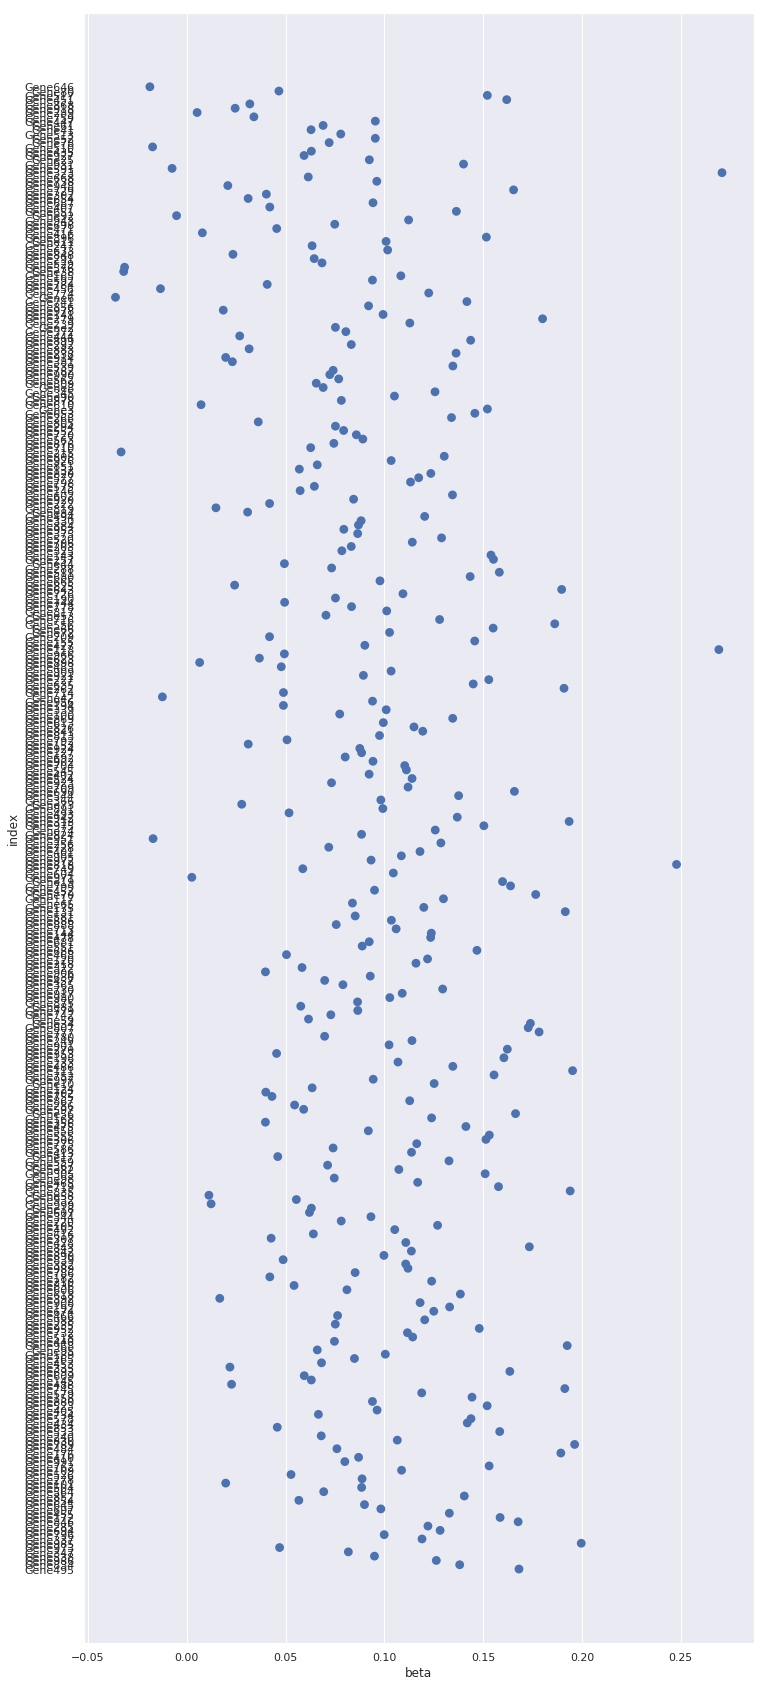

In [109]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 30)})
ax = sns.pointplot(x="beta", y="index", data=snp0_df_real, join=False)

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
error_half = list(snp0_df_real['SE']/2)
ax.errorbar(x_coords, y_coords, yerr=[error_half, error_half], fmt=' ')

In [19]:
# beta_dict = defaultdict(list)
# se_dict = defaultdict(list)

# genne = []
# beta = []
# se = []
# sim_snp0 = sim_matrixeqtl[sim_matrixeqtl['SNP'] == 'SNP0']
# for gene in top_negenes:
#     #beta_dict[gene].append(matrixeqtl.loc[(matrixeqtl['SNP'] == 'chr1_147242742') & (matrixeqtl['gene'] == gene_dict[gene])]['beta'])
# #     beta_df = sim_snp0.loc[(sim_snp0['SNP'] == 'SNP0') & (sim_snp0['gene'] == gene)]['beta']
#     df = sim_snp0.loc[sim_snp0['gene'] == gene]
#     beta_df = df['beta']
#     se_df = df['beta']/df['t-stat']

#     for beta in beta_df:
#         beta_dict[gene].append(beta)
#     for se in se_df:
#         se_dict[gene].append(se)
# #     break


In [20]:
top_negenes

Index(['Gene495', 'Gene834', 'Gene986', 'Gene538', 'Gene347', 'Gene973',
       'Gene985', 'Gene337', 'Gene796', 'Gene694',
       ...
       'Gene61', 'Gene447', 'Gene759', 'Gene289', 'Gene918', 'Gene868',
       'Gene451', 'Gene517', 'Gene80', 'Gene646'],
      dtype='object', length=351)

In [100]:
error_half = list(snp0_df_top['SE'])[:10]

<ErrorbarContainer object of 3 artists>

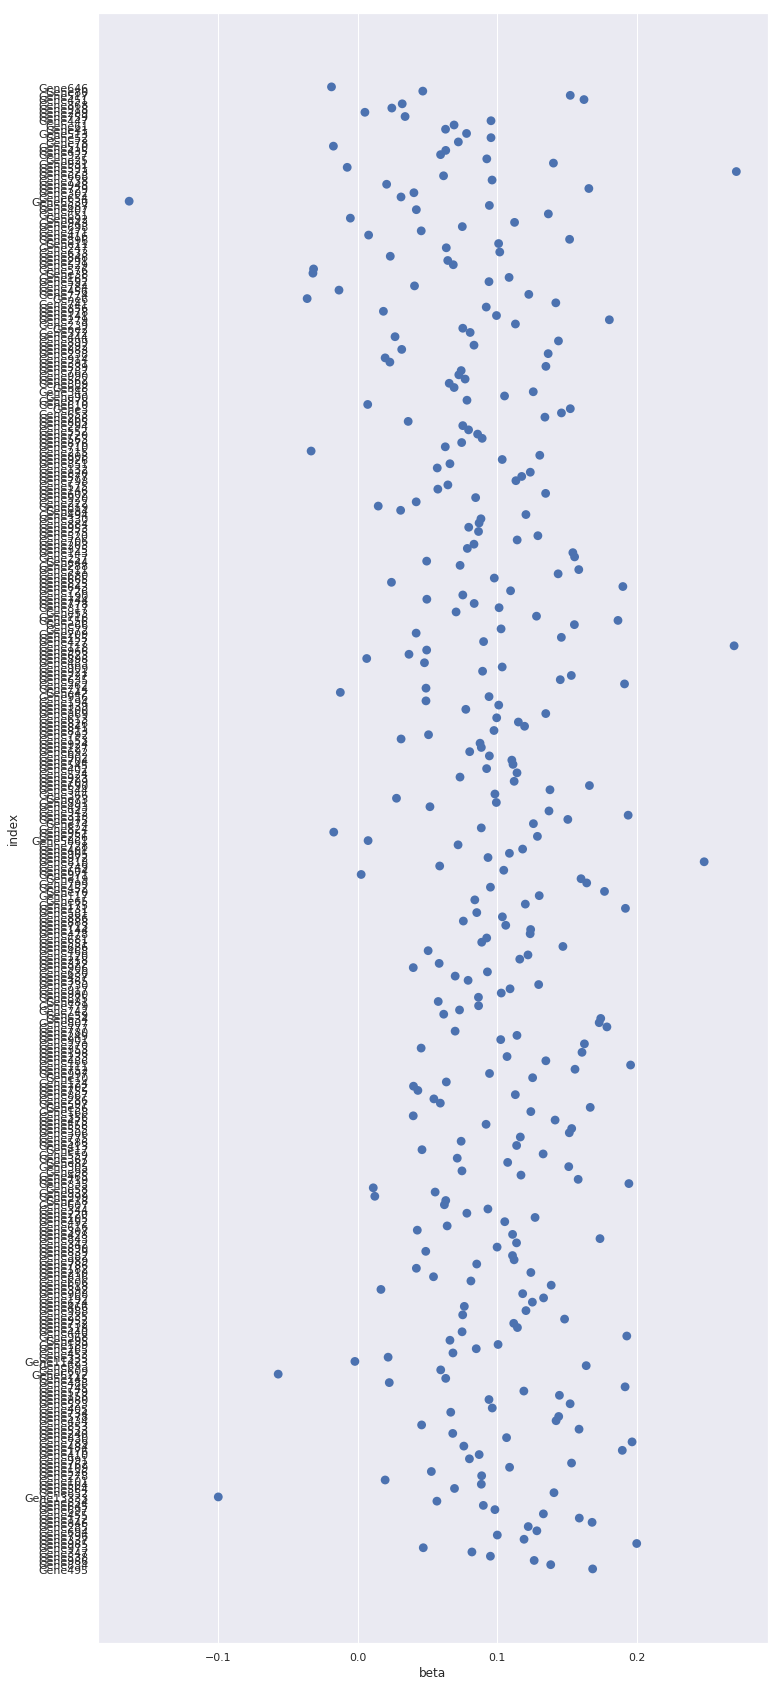

In [104]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 30)})
ax = sns.pointplot(x="beta", y="index", data=snp0_df_top, join=False)

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
error_half = list(snp0_df_top['SE'])
ax.errorbar(x_coords, y_coords, yerr=[error_half, error_half], fmt=' ')

In [75]:
snp0_df_top['SE']

0      0.059131
1      0.058692
2      0.065493
3      0.066315
4      0.063409
         ...   
346    0.063725
347    0.064022
348    0.065820
349    0.063905
350    0.061945
Name: SE, Length: 351, dtype: float64

In [73]:
tips = sns.load_dataset('tips')
errors = tips.groupby(['smoker', 'sex']).std()['tip']
errors

smoker  sex   
Yes     Male      1.500120
        Female    1.219916
No      Male      1.489559
        Female    1.128425
Name: tip, dtype: float64

In [31]:
ax = sns.pointplot('sex', 'tip', hue='smoker',
    data=tips, dodge=True, join=False, ci=None)



# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
errors = tips.groupby(['smoker', 'sex']).std()['tip']
colors = ['steelblue']*2 + ['coral']*2
ax.errorbar(x_coords, y_coords, yerr=errors,
    ecolor=colors, fmt=' ', zorder=-1)

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [113]:
def get_topgenes_df(PC, snp, sim_topgenes, sim_loadings, sim_matrixeqtl):
    # get the "significant" top genes with sorted loadings
    num_posgenes = len(sim_topgenes.loc[PC][0].split("'")[1::2])
    num_negenes = len(sim_topgenes.loc[PC][1].split("'")[1::2])
    top_genes = sim_loadings.sort_values(PC, ascending=False)[PC].index
    top_posgenes = top_genes[:num_posgenes]
    top_negenes = top_genes[-num_negenes:][::-1]
    
    # df with only snp of interest
    sim_snp = sim_matrixeqtl[sim_matrixeqtl['SNP'] == snp]
    snp_df_neg = sim_snp[sim_snp['gene'].isin(top_negenes)]
    se = snp_df_neg['beta']/snp_df_neg['t-stat']
    snp_df_neg.insert(3, "SE", se, True)
    snp_df_neg = snp_df_neg.set_index('gene').reindex(top_negenes)
    # snp0_df_top.rename_axis('gene').reset_index(level=0, inplace=True)
    snp_df_neg.reset_index(level=0, inplace=True)
    
    snp_df_pos = sim_snp[sim_snp['gene'].isin(top_posgenes)]
    se = snp_df_pos['beta']/snp_df_pos['t-stat']
    snp_df_pos.insert(3, "SE", se, True)
    snp_df_pos = snp_df_pos.set_index('gene').reindex(top_posgenes)
    # snp0_df_top.rename_axis('gene').reset_index(level=0, inplace=True)
    snp_df_pos.reset_index(level=0, inplace=True)
    
    return snp_df_pos, snp_df_neg

In [114]:
sim_loadings = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_0/expressionPCs/gene-snp-eqtl_PCs_loadings', sep='\t', index_col=0)
sim_topgenes = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_0/expressionPCs/gene-snp-eqtl_PCs_topgenes', sep='\t', index_col=0)
sim_pcs_matrixeqtl = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_0/expressionPCs/gene-snp-eqtl_PCs', sep='\t')
sim_matrixeqtl = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_10000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')

TypeError: unsupported operand type(s) for -: 'list' and 'list'

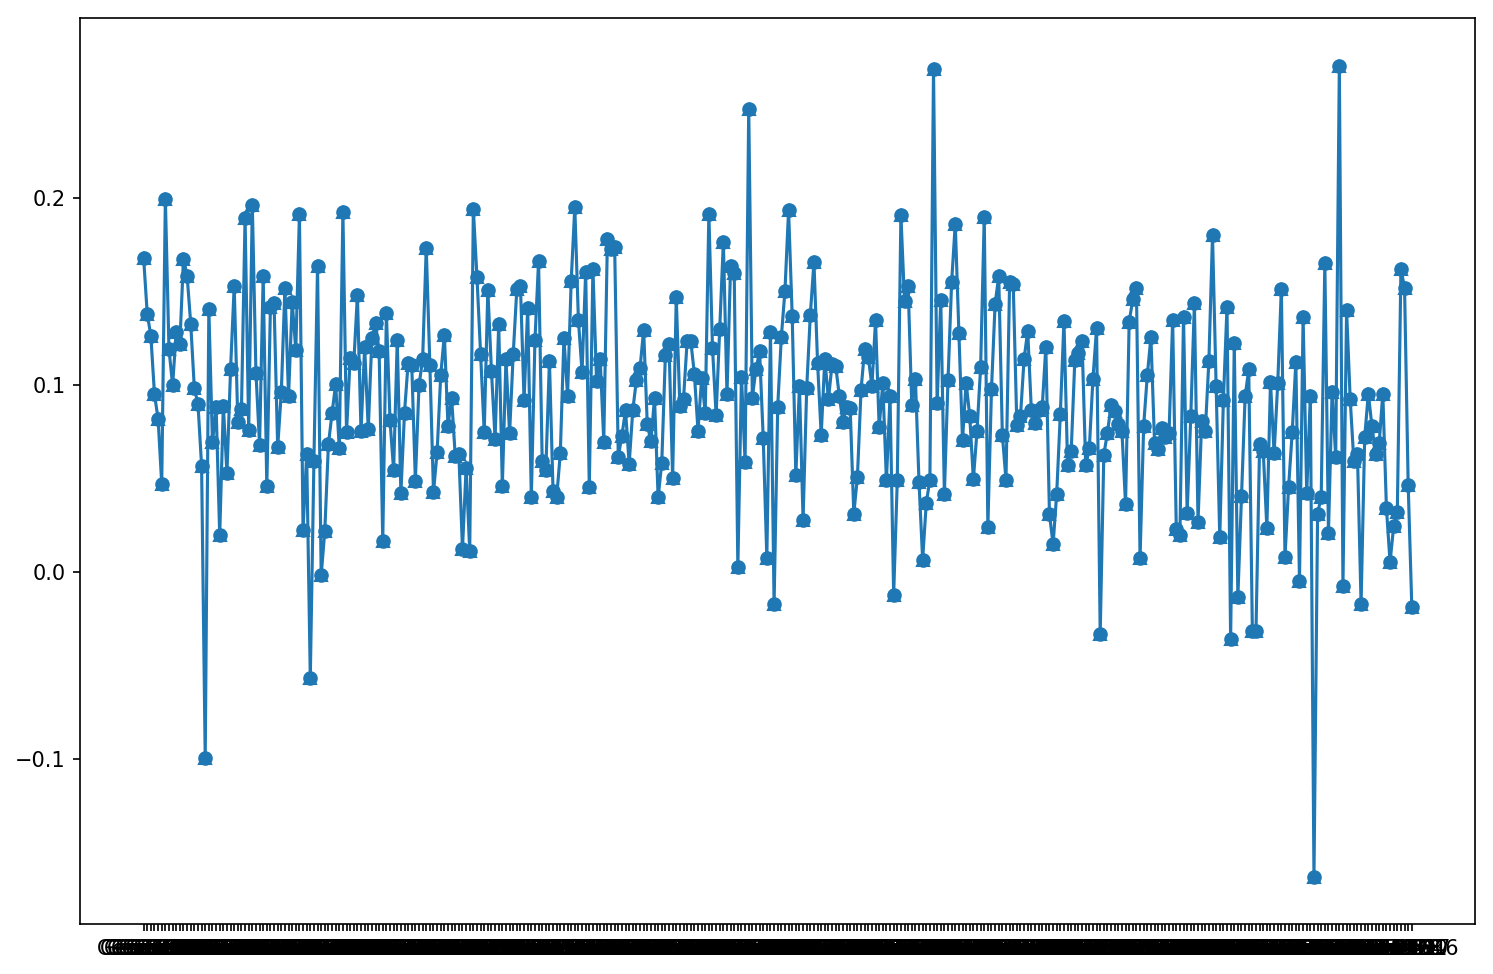

In [29]:
# data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
plt.figure(figsize=(12, 8), dpi=150)
names = list(beta_dict.keys())
values = list(beta_dict.values())
se = list(se_dict.values())


plt.scatter(names, values)
plt.errorbar(names, values, yerr=se, marker="^", capsize=10)




In [115]:
sim_pcs_matrixeqtl

SNP   gene          beta    t-stat       p-value       FDR
0       SNP0   PC51  2.323791e+00  5.729996  1.740784e-08  0.000870
1       SNP0   PC36 -2.642183e+00 -5.362905  1.255910e-07  0.003140
2       SNP0   PC40  2.343799e+00  5.150409  3.750720e-07  0.006251
3       SNP0   PC60 -1.842007e+00 -4.889669  1.365029e-06  0.017063
4       SNP0   PC46  1.951433e+00  4.496865  8.588410e-06  0.085884
...      ...    ...           ...       ...           ...       ...
49995   SNP0  PC334  6.181370e-08  0.000030  9.999758e-01  0.999999
49996  SNP98  PC232  4.001622e-08  0.000013  9.999893e-01  0.999999
49997   SNP0  PC413 -1.370866e-08 -0.000008  9.999938e-01  0.999999
49998   SNP0  PC417  8.101363e-09  0.000005  9.999963e-01  0.999999
49999  SNP96    PC5 -2.205866e-06 -0.000001  9.999989e-01  0.999999

[50000 rows x 6 columns]

In [116]:
snp_df_pos, snp_df_neg = get_topgenes_df('PC51', 'SNP0', sim_topgenes, sim_loadings, sim_matrixeqtl)

<ErrorbarContainer object of 3 artists>

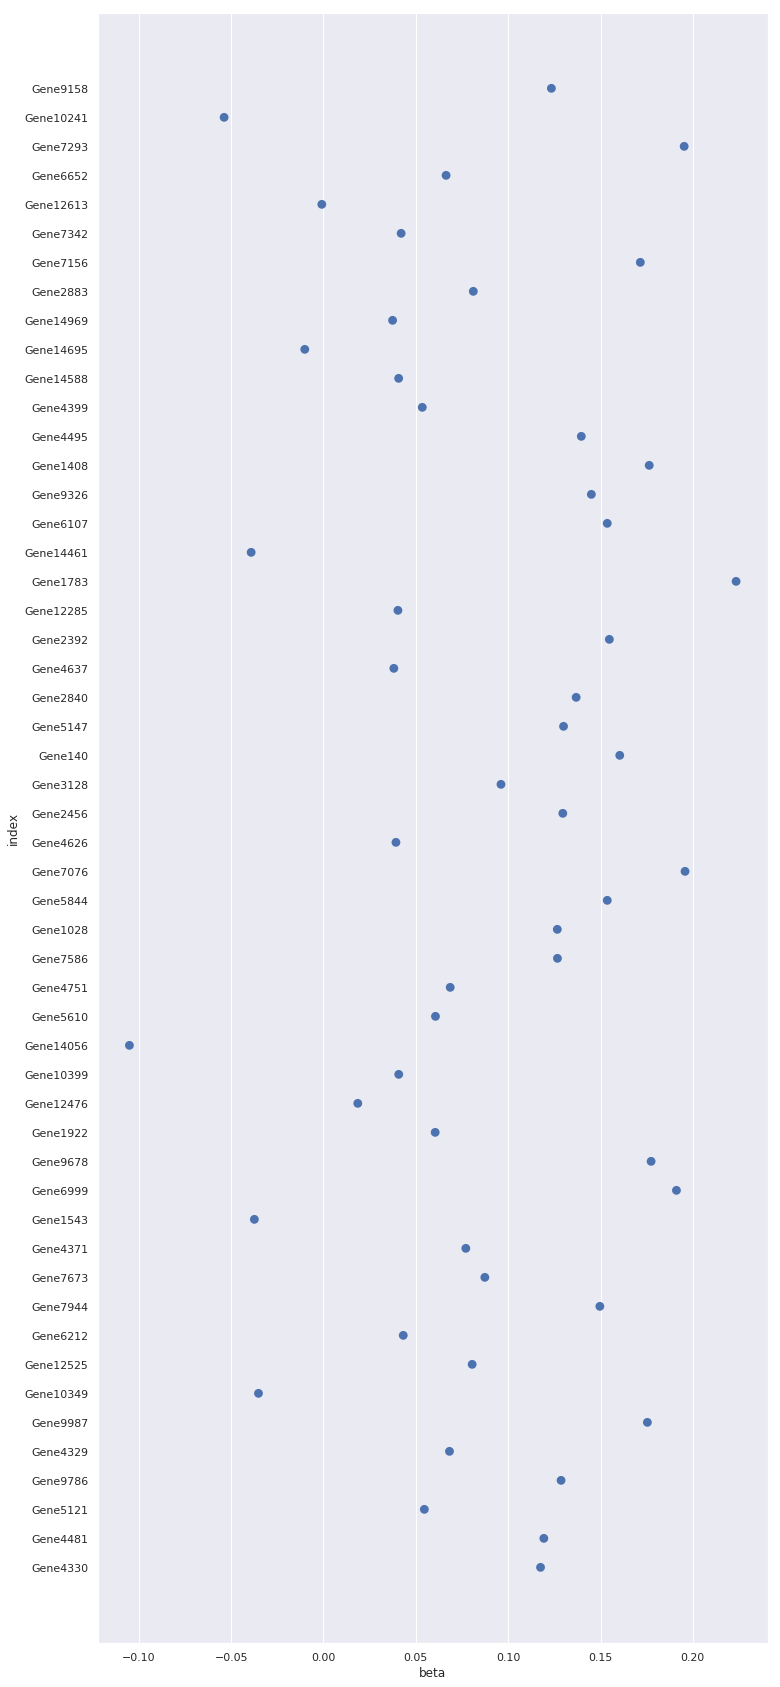

In [119]:
# import seaborn as sns
sns.set(rc={'figure.figsize':(12, 30)})
ax = sns.pointplot(x="beta", y="index", data=snp_df_pos, join=False)

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
error_half = list(snp_df_pos['SE'])
ax.errorbar(x_coords, y_coords, yerr=[error_half, error_half], fmt=' ')


<ErrorbarContainer object of 3 artists>

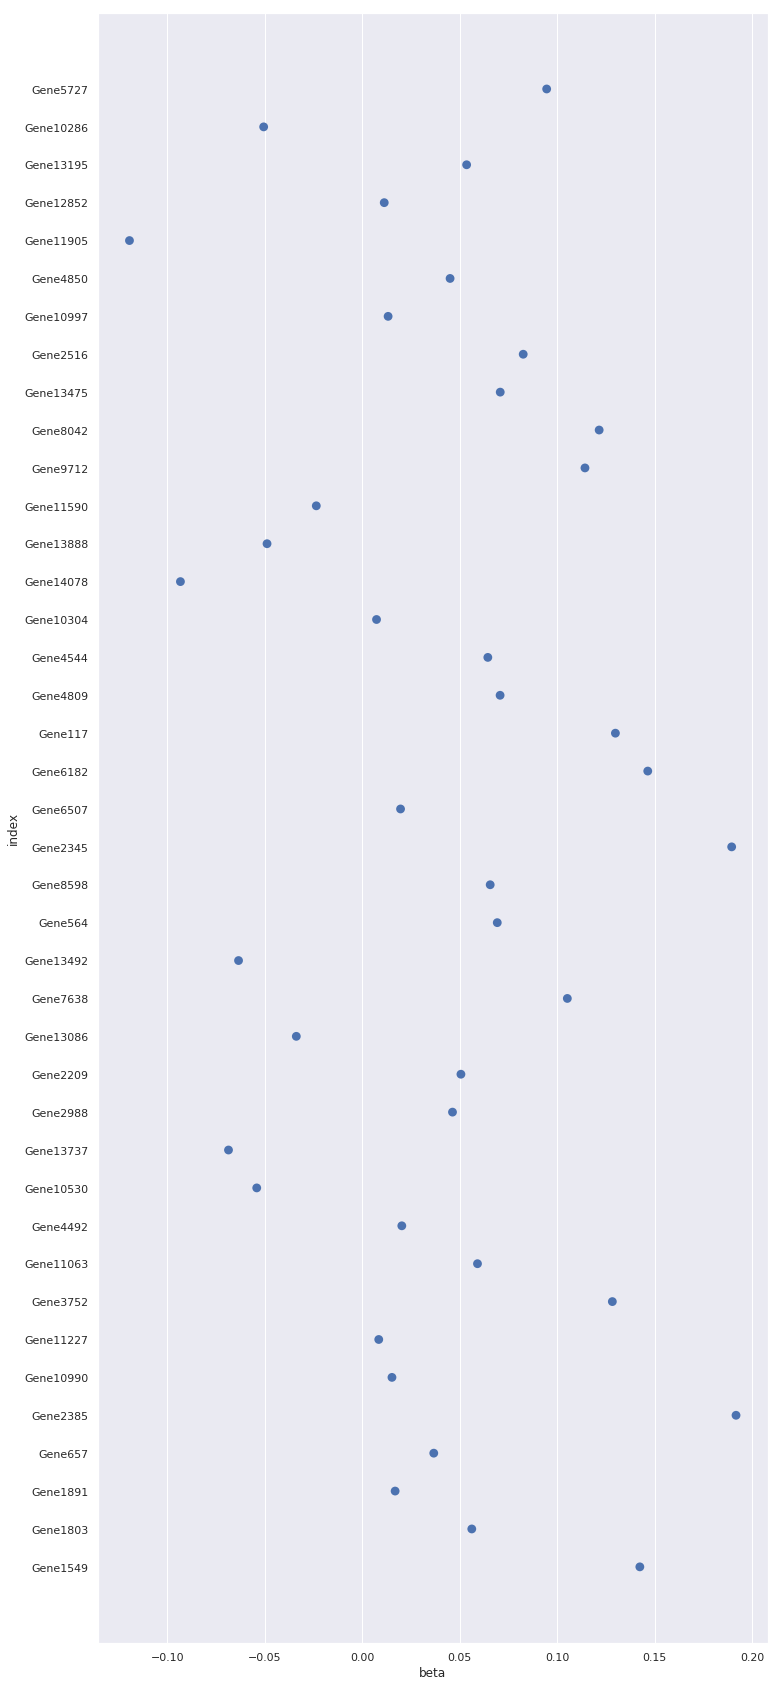

In [122]:
# import seaborn as sns
sns.set(rc={'figure.figsize':(12, 30)})
ax = sns.pointplot(x="beta", y="index", data=snp_df_neg, join=False)

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
error_half = list(snp_df_neg['SE'])
ax.errorbar(x_coords, y_coords, yerr=[error_half, error_half], fmt=' ')


(array([6.70000e+01, 2.15400e+03, 2.88010e+04, 1.84943e+05, 4.91465e+05,
        5.25933e+05, 2.23356e+05, 3.99180e+04, 3.23200e+03, 1.31000e+02]),
 array([-0.3242472 , -0.26028144, -0.19631568, -0.13234991, -0.06838415,
        -0.00441839,  0.05954738,  0.12351314,  0.1874789 ,  0.25144467,
         0.31541043]),
 <a list of 10 Patch objects>)

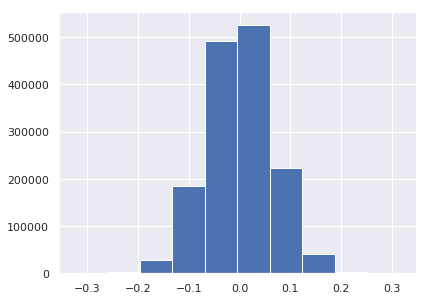

In [121]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.hist(list(sim_matrixeqtl['beta']))

In [1]:
import pandas as pd

In [52]:
sim_loadings = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/expressionPCs/gene-snp-eqtl_PCs_loadings', sep='\t', index_col=0)
sim_topgenes = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/expressionPCs/gene-snp-eqtl_PCs_topgenes', sep='\t', index_col=0)
sim_pcs_matrixeqtl = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/expressionPCs/gene-snp-eqtl_PCs', sep='\t')
sim_matrixeqtl = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')

In [53]:
# sim_loadings

In [54]:
# sim_pcs_matrixeqtl

In [60]:
c = np.array(['red'] * 1000 + ['blue'] * 14000)

In [61]:
# sim_loadings.plot.scatter(x='PC51', y='PC36', c=c)

In [62]:
X = sim_loadings
y = c == 'red'

In [65]:
np.sum(y[1000:])

0

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
logres = LogisticRegression()
logres.fit(X=X_train, y=y_train)

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
np.mean(y_train), np.mean(y_test)

(0.6661691542288557, 0.6676767676767676)

In [69]:
y_train_pred = logres.predict(X_train)

In [70]:
np.mean(y_train_pred == y_train)

0.9350248756218905

In [71]:
y_test_pred = logres.predict(X_test)

In [72]:
np.mean(y_test_pred == y_test)

0.9343434343434344

In [76]:
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred = kmeans.fit_predict(X)

In [80]:
np.mean(y_pred == y)

0.5362

In [91]:
sim_pcs_matrixeqtl

SNP   gene          beta     t-stat       p-value           FDR
0       SNP0  PC203 -1.037521e+00 -13.227190  1.924024e-34  9.620121e-30
1      SNP94  PC261 -1.111645e-02  -4.458865  1.019052e-05  2.547629e-01
2      SNP57  PC128 -9.412034e-01  -4.313307  1.940063e-05  2.986749e-01
3      SNP68   PC40 -2.024176e+00  -4.265319  2.389400e-05  2.986749e-01
4      SNP27  PC329  8.327085e-03   4.184954  3.372016e-05  3.372016e-01
...      ...    ...           ...        ...           ...           ...
49995   SNP0  PC344 -1.272919e-07  -0.000064  9.999493e-01  9.999951e-01
49996   SNP0  PC426  1.072395e-07   0.000063  9.999500e-01  9.999951e-01
49997  SNP77  PC365  6.605117e-08   0.000035  9.999724e-01  9.999951e-01
49998  SNP16  PC175  1.344848e-06   0.000009  9.999929e-01  9.999951e-01
49999   SNP0  PC373  1.165731e-08   0.000006  9.999951e-01  9.999951e-01

[50000 rows x 6 columns]

In [100]:
-np.log(sim_pcs_matrixeqtl[sim_pcs_matrixeqtl['SNP']=='SNP0']['p-value'])

0        77.633474
12        8.754281
27        7.885259
79        6.578191
96        6.413183
           ...    
49991     0.000062
49994     0.000053
49995     0.000051
49996     0.000050
49999     0.000005
Name: p-value, Length: 500, dtype: float64

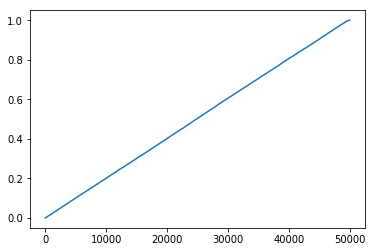

In [88]:
plt.plot(sim_pcs_matrixeqtl['p-value'])

In [90]:
print(list(sim_pcs_matrixeqtl['p-value']))

[1.92402415346642e-34, 1.01905167474036e-05, 1.94006275828668e-05, 2.3893995910184303e-05, 3.37201594528928e-05, 6.4445889413401e-05, 7.69847558872395e-05, 0.000109274764652008, 0.00012573912811702, 0.000129652135378008, 0.00014697872443133, 0.000153579169521449, 0.000157784399444904, 0.000158464190782453, 0.000172811712451102, 0.000194392873494275, 0.000200594939012282, 0.000207602035074985, 0.000208157433327556, 0.000208530059713143, 0.00023862454580518902, 0.000249418479942814, 0.000278564282072811, 0.00030325110922200296, 0.000319263617675666, 0.000341688463006625, 0.000373500388832306, 0.00037624905102841, 0.000377676805324071, 0.00038164341937881496, 0.000400174017178288, 0.000404544849768956, 0.000426156938019635, 0.000434853412564511, 0.00044968207995553397, 0.000518881370263742, 0.000535181078937846, 0.0005592049910529389, 0.000578300734575766, 0.000592358071383618, 0.0006144417392893151, 0.000642819604602444, 0.0006460551303181809, 0.000681487262782834, 0.000710410561356671, 

### unsupervised $\ell_g$, $R_g$

In [354]:
sim_loadings = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/expressionPCs/gene-snp-eqtl_PCs_loadings', sep='\t', index_col=0)
sim_topgenes = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/expressionPCs/gene-snp-eqtl_PCs_topgenes', sep='\t', index_col=0)
sim_pcs_matrixeqtl = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/expressionPCs/gene-snp-eqtl_PCs', sep='\t')
sim_matrixeqtl = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')

In [355]:
X = sim_loadings
# y = np.array([1] * 1000 + [0] * 14000)
X.shape

(15000, 500)

In [356]:
X = np.abs(X.reindex(sim_pcs_matrixeqtl[sim_pcs_matrixeqtl['SNP']=='SNP0']['gene'], axis=1))

In [357]:
w = 1/(sim_pcs_matrixeqtl[sim_pcs_matrixeqtl['SNP']=='SNP0']['p-value']) - 1
w /= np.sum(w)

In [358]:
L = X.dot(w.to_numpy())

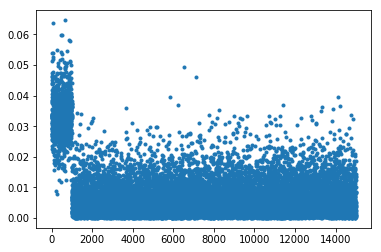

In [359]:
plt.plot(L.to_numpy(), marker='.', linestyle='')

In [360]:
X = sim_loadings
X = np.abs(X.reindex(sim_pcs_matrixeqtl[sim_pcs_matrixeqtl['SNP']=='SNP0']['gene'], axis=1))

In [361]:
X = X.rank(ascending=False)

In [362]:
w = 1/(sim_pcs_matrixeqtl[sim_pcs_matrixeqtl['SNP']=='SNP0']['p-value']) - 1
w /= np.sum(w)

In [363]:
R = X.dot(w.to_numpy())

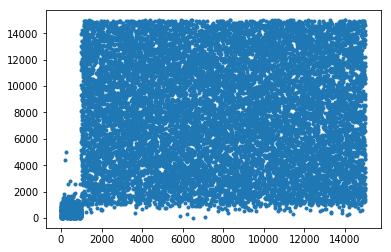

In [364]:
plt.plot(R.to_numpy(), marker='.', linestyle='')

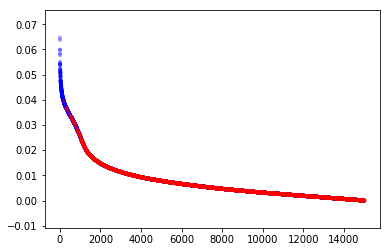

In [365]:
plt.scatter(R, L, c=['blue'] * 10000 + ['red'] * 5000, alpha=0.3, marker='.')